## ECOSYSTEM SURVEILLANCE (AusPlots)  TUTORIAL: UNDERSTANDING AND USING THE 'ausplotsR' PACKAGE AND AusPlots DATA


This document contains a tutorial on how to access and use TERN's Ecosystem Surveillance (AusPlots) data.We will explore the use of both the package 'ausplotsR' & the 'ausplots' data that can be downloaded with this package. 

`ausplotsR` is an R package for live extraction and preparation of TERN AusPlots ecosystem monitoring data. Through ausplotsR, users can: (1) directly obtain plot-based data on vegetation and soils across Australia, and (2) preprocess these data into structures that facilitate the visualisation and analysis of ausplots data. Data preprocessing includes the computation of species occurrence, vegetation cover, growth form, and basal area. 

In this section of the workshop we will cover the following aspects:

1. ACCESSING AND INSTALLING THE `ausplotsR` PACKAGE (plus its Dependencies).

2. OBTAIN & EXPLORE AusPlots DATA: `get_ausplots` function:
  * `get_ausplots` function
  * Explore the structure of the obtained AusPlots data.

3. MANIPULATING AusPlots DATA:
  * Find the 5 most sampled Bioregions. 
  * Subset sites in the 5 most sampled Bioregions (in all DFs in the list)
  
4. MAP THE SITES
  * Obtain and prepare a map of Australia
  * Plot AusPlots sites in the 5 most sampled Bioregions on the map of Australia.
  
5. SPECIES-LEVEL DATA: `species_table` function and species occurrence matrices (for the 5 most sampled Bioregions).
  * First step: Create a species occurrence matrix. Compute Species by Site table using the function `species_table`
  * Species Abundance/Percent Cover:
    * Percent Cover (Abundance) by Site Visit x Species (i.e. in all 'cells')
    * Abundance (Cover %) by Species. Find and plot 4 most abundant species on a map (dot size proportional to Abundance).
  * Species Occurrence (Presence/Absence): 
    * Presence/Absence across all Cells (i.e. Site Visit x Species).
    * Total Presence/Absence  for each Species (i.e. per data frame Column): 
      * Frequencies: Absolute and Relative.
      * Calculate and Plot (histogram): Presence (Absolute and Relative) Frequencies.
  * Species Diversity: 
    * Calculate various indices and create a data frame with these indices.
    * Plot 2 indices: Species Richness (from vouchers, more species recorded), and Shannon Index (from veg.PI for abundances) on a map (dot size proportional to the relevant diversity metric) .
  * Rank-Abundance Curves (= Whittaker Plots) & Relative Abundance Models
    * Rank-Abundance Curves for the First 5 Site-Visits
    * Possible Models of Relative Abundance for one Community
    * Rank-Abundance Curves for each Bioregion (using the Species Mean Cover)
    
6. PROPORTIONAL VEGETATION COVER (= FRACTIONAL COVER): `fractional_cover' function.     

  * Latitudinal pattern in proportional vegetation cover (for a random subset of 200 sites).
  * Temporal Variation in Fractional Cover: Explore, display, and assess (for 5 sites visited twice).

7. GROWTH FORM: `growth_form_table` function (for 5 most sampled bioregions)
  * Plant Growth Forms Percent Cover against Sites : Compute using `growth_form_table`
  * Cluster (Hierarchical Clustering) by Plant Growth Forms Percent Cover, colour branches by bioregion. 

8. TOTAL VEGETATION COVER BY GROWTH FORM AND/OR HEIGHT: `single_cover_value` function (for 5 most sampled bioregions).
  * Total Vegetation Cover of Any Green Vegetation >= 2m in Height
  * Total Vegetation Cover of Trees >= 5m in Height (i.e. default arguments)
  * Total Vegetation Cover of "Tussoc grass" of any Height (i.e. >= 0m height)

9. BASAL AREA (OR NUMBER OF BASAL WEDGE HITS): `basal_area` function (for 5 most sampled bioregions).
  * Basal Area for each plot (m2/ha): Compute using `basal_area`.
  * Display Basal Areas on map of Australia (dots size proportional to Basal Area).
  * Boxplot of Basal Areas by Bioregion. 



### REQUIRED LIBRARIES 

To run the R scripts in this tutorial a number of R packages (and their dependencies) must be installed. In addition to `ausplotsR`, which is at the core of this tutorial, the following packages are required: `dendextend`, `ggplot2`, `goeveg`, `gridExtra`, `mapdata`, `maps`, `maptools`, `sp`, and `vegan`. 

The first step to install packages in R is selecting the CRAN (Comprehensive R Archive Network) mirror. Mirror selection and package installation can be done via R's menu (Packages/Set CRAN mirror... followed by Packages/install package(s)...) or programmatically the function `install.packages` (selecting the CRAN mirror using the argument `repos`). Typically is best to choose the `cloud` mirror (which automatically redirects to an appropriate server worldwide) or a mirror close to you (e.g. in your institution, country,..). A list of Comprehensive R Archive Network (CRAN) mirror URLs can be found [here](https://cran.r-project.org/mirrors.html). 

This is how you can install and load the R packages required for this tutorial. 

If you need to install any of the required packages but `ausplotsR`, which is a special case (see below), uncomment the script below. 


In [3]:

## Select the repository (i.e. CRAN mirror URL)
#my.repos = "https://cloud.r-project.org/"
#my.repos = "https://cran.csiro.au/"  # Example of an Australian mirror

## Install other required libraries
#install.packages(c("ausplotsR", "vegan", "goeveg", "maps", "maptools", "mapdata", "sp", ggplot2", "gridExtra", "ggspatial", "dendextend"), repos=my.repos)



Now the packages can be loaded using the `library` command. 


In [4]:

# Load packages
library(ausplotsR)  # If not loaded above
library(vegan)
library(goeveg)

library(maps)
library(maptools)
library(mapdata)
library(sp)
library(ggplot2)
library(gridExtra)
#library(ggspatial)

library(dendextend)


Loading required package: plyr
Loading required package: R.utils
Warning message:
"package 'R.utils' was built under R version 3.5.3"Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.22.0 (2018-04-21) successfully loaded. See ?R.oo for help.

Attaching package: 'R.oo'

The following objects are masked from 'package:methods':

    getClasses, getMethods

The following objects are masked from 'package:base':

    attach, detach, gc, load, save

R.utils v2.8.0 successfully loaded. See ?R.utils for help.

Attaching package: 'R.utils'

The following object is masked from 'package:utils':

    timestamp

The following objects are masked from 'package:base':

    cat, commandArgs, getOption, inherits, isOpen, parse, warnings

Loading required package: simba
Loading required package: vegan
Warning message:
"package 'vegan' was built under R version 3.5.3"Loading required package: permute



### ACCESSING AND INSTALLING THE `ausplotsR` PACKAGE (plus its Dependencies)

Currently `ausplotsR` must be installed directly from github using the 'devtools' package, which must have been previously installed. The GitHub site for `ausplotsR` contains the latest developments and information on the package; it can be found in [this link](https://github.com/ternaustralia/ausplotsR).


In [5]:

## Install directly from github using the 'devtools' package
## Thus, 'devtools' must be previouly installed
install.packages("devtools", repos="https://cloud.r-project.org/")
library(devtools)
install_github("ternaustralia/ausplotsR", build_vignettes = TRUE)

## Load the package
library(ausplotsR)

## Obtaining Help and Initial Steps
help(ausplotsR)
browseVignettes(package="ausplotsR")


Installing package into 'C:/Users/uqbblanc/Documents/R/win-library/3.5'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
         binary source needs_compilation
devtools  2.0.1  2.0.2             FALSE



installing the source package 'devtools'



ERROR: Error in utils::download.file(url, path, method = download_method(), quiet = quiet, : cannot open URL 'https://api.github.com/repos/ternaustralia/ausplotsR/tarball/master'



###  OBTAIN & EXPLORE AusPlots DATA: `get_ausplots` function

This function extracts and compiles AusPlots data. 

Data of specific types, sites, geographical locations, and/or species can be requested via the function arguments.

*DATA TYPES: * Up to 8 different types of data can be obtained by setting the corresponding arguments to TRUE/FALSE:

  * `site_info`: Site summary data. Includes (among others): plot and visit details, landform data, geographic coordinates, and notes. Included by default. 
  * `structural_summaries`: Site vegetation structural summaries
  * `veg.vouchers`: Complete set of species records for the plot determined by a herbarium plus ID numbers for silica-dried tissue samples. Included by default.
  * `veg.PI`: Point Intercept (PI) data. Includes data on: substrate, plant species, growth form and height, etc at each of (typically) 1010 points per plot. Included by default.
  * `basal.wedge`: Basal Wedge Data Raw Hits. These data are required for the calculation of Basal Area by Species by Plot.
  * `soil_subsites`: Information on what soil and soil metagenomics samples were taken at nine locations across the plot and their identification barcode numbers. 
  * `soil_bulk_density`: 
  * `soil_character`: Soil characterisation and sample ID data at 10 cm increments to a depth of 1 m.

*SPATIAL FILTERING: * AusPlot data can be spatially subset via the `get_ausplots` function arguments in two ways:

  * `my.Plot_IDs`: Character vector with the plots IDs of specific AusPlots plots. 
  * `bounding_box`: Spatial filter for selecting AusPlots based on a rectangular box, in the format of e.g. c(xmin, xmax, ymin, ymax). AusPlots spatial data are are in longlat, thus x is the longitude and y is the latitude of the box/extent object (e.g., c(120, 140, -30, -10)).  
  
*SPECIES FILTERING: * AusPlots data can also be subset by particular or sets of genus and/or species (i.e. as determined for the herbarium voucher) using the argument `species_name_search`. This optional argument takes the form of a character string indicating the terms to search and subset. Search terms are not case sensitive and do not require an exact taxonomic match (e.g. "Eucalyptus moderata","Eucalyptus", and "euca" are all acceptable search terms). If `veg.vouch=TRUE`, which is the default, `veg.vouch` will return a data frame that only includes voucher records that match the species_name_search.

The R object resulting from calling `get_ausplots` is a list of data frames containing the requested AusPlots data. The list includes a data frame for each type of data requested (i.e. up to 8 data frames: 'site_info', 'structural_summaries',...) and an auto-generated citation for the data extracted. Please cite ausplotsR and the TERN AusPlots data you use. In each data frame the columns correspond to the variables supplied for each type of data and the number of rows (directly or indirectly) depends on the sites (i.e. via `my.Plot_IDs` or `bounding_box` if subsetted) or species (i.e. via `species_name_search` if subset) retrieved. 

There are several variables common to all data frames. These include `site_location_name`, `site_location_visit_id`, and `site_unique` (a combination of the previous two). These variables can be used to interrelate the data frames. For example, the contents of two data frames can be combined using the common variable as a link (i.e. guidance to add the merged contents in the correct row). We will see multiple examples of data frame contents merges later in this tutorial. The variable 'site_unique' is typically the best option to link data frames, as it is the most specific variable representing a single visit to a particular site and it should be used in most analyses. Otherwise, errors such including data from the wrong visit to a site can occur. 


In [6]:

# Example 1: All available data (i.e. all data types) for 3 plots
# ===============================================================

# Obtain the data ('site_info', 'veg.vouchers', and 'veg.PI' are retraived by default)
AP.data = get_ausplots( my.Plot_IDs=c("SATFLB0004", "QDAMGD0022", "NTASTU0002"),
	                    structural_summaries=TRUE, basal.wedge=TRUE,
						          soil_subsites=TRUE, soil_bulk_density=TRUE, soil_character=TRUE  )

# Explore retrieved data
class(AP.data)
summary(AP.data)
str(AP.data)


# Example 2: Default data for a particular Geographic Extent
# ==========================================================

# 'site_info', 'veg.vouchers', and 'veg.PI' data retrived for Brisbane (27.4698S, 153.0251E) and its sourrounding area
AP.data = get_ausplots(bounding_box=c(152.5, 153.5, -28, -27))

# Explore retrieved data
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 


# Example 3: Default data + basal.wedge + structural_summaries for the genus Eucalyptus
# =====================================================================================

# Default data frames ('site_info', 'veg.vouchers', and 'veg.PI') + 'basal.wedge' + structural_summaries data frames for the genus Eucalyptus
AP.data = get_ausplots(basal.wedge=TRUE, structural_summaries=TRUE, species_name_search="Eucalyptus") 

# Explore retrieved data
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

# Explore species contained in each data frame
head(AP.data$veg.vouch) # Filtered species: Only eucalyptus
head(AP.data$veg.PI)  # Unfiltered species
head(AP.data$veg.basal)  # Unfiltered species
head(AP.data$struct.summ)  # Unfiltered species


# Example 4: 'site_info', 'veg.PI', and 'basal.wedge' data for all sites
# ======================================================================

# Retreive data
start.time = Sys.time()
AP.data = get_ausplots(veg.vouchers=FALSE, basal.wedge=TRUE) 
end.time = Sys.time()
end.time - start.time

# Explore 
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

# Explore 'site_info' data
dim(AP.data$site.info)
names(AP.data$site.info)
head(AP.data$site.info)

# Explore 'veg_PI' data
dim(AP.data$veg.PI)
names(AP.data$veg.PI)
head(AP.data$veg.PI)


User-supplied Plot_IDs located. 


[1] "list"

              Length Class      Mode     
site.info     43     data.frame list     
struct.summ   15     data.frame list     
soil.subsites 12     data.frame list     
soil.bulk     15     data.frame list     
soil.char     34     data.frame list     
veg.basal     10     data.frame list     
veg.vouch     12     data.frame list     
veg.PI        13     data.frame list     
citation       1     -none-     character

List of 9
 $ site.info    :'data.frame':	3 obs. of  43 variables:
  ..$ site_location_name        : chr [1:3] "QDAMGD0022" "SATFLB0004" "NTASTU0002"
  ..$ established_date          : chr [1:3] "2013-06-04T00:00:00" "2012-09-18T00:00:00" "2016-05-01T16:58:00"
  ..$ description               : chr [1:3] "Mackunda Downs Station, 500m east of homestead.  26km west of Middleton." "Brachina Gorge Heysen Range Lower. 63km North North East of Adelaide" "Maryfield Station, 7.6km north north west of homestead. 27.5km south east of Larrimah"
  ..$ bioregion_name            : chr [1:3] "MGD" "FLB" "STU"
  ..$ landform_pattern          : chr [1:3] "ALP" "MOU" "PLA"
  ..$ landform_element          : chr [1:3] "PLA" "HSL" "PLA"
  ..$ site_slope                : chr [1:3] "1" "17" "0"
  ..$ site_aspect               : chr [1:3] "180" "225" NA
  ..$ comments                  : chr [1:3] "Astrebla pectinata / Cenchrus ciliaris / Astrebla elymoides low open tussock grassland on alluvial plain adjoin"| __

          Length Class      Mode     
site.info 43     data.frame list     
veg.vouch 12     data.frame list     
veg.PI    13     data.frame list     
citation   1     -none-     character

            Length Class      Mode     
site.info   43     data.frame list     
struct.summ 15     data.frame list     
veg.basal   10     data.frame list     
veg.vouch   12     data.frame list     
veg.PI      13     data.frame list     
citation     1     -none-     character

site_location_name,veg_barcode,herbarium_determination,is_uncertain_determination,visit_start_date,site_location_visit_id,primary_gen_barcode,secondary_gen_barcode_1,secondary_gen_barcode_2,secondary_gen_barcode_3,secondary_gen_barcode_4,site_unique
NTAMGD0003,NTA018666,Eucalyptus tetrodonta,FALSE,2016-04-28T09:38:07,58431,NA,NA,NA,NA,NA,NTAMGD0003-58431
NTASTU0003,NTA017292,Eucalyptus patellaris,FALSE,2016-05-01T15:10:00,58430,NTA017293,NA,NA,NA,NA,NTASTU0003-58430
NTASTU0004,NTA017646,Eucalyptus tectifica,FALSE,2016-05-03T09:41:51,58426,NTA017647,NA,NA,NA,NA,NTASTU0004-58426
SASMDD0008,SAS001838,Eucalyptus camaldulensis subsp. camaldulensis,FALSE,2015-04-26T08:29:02,57638,SAS001839,SAS001841,SAS001840,SAS001842,NA,SASMDD0008-57638
SASMDD0008,SAS001782,Eucalyptus largiflorens,FALSE,2015-04-26T08:29:02,57638,SAS001783,SAS001784,SAS001785,SAS001786,SAS001787,SASMDD0008-57638
WAACOO0022,WAA 001863,Eucalyptus celastroides subsp. celastroides,FALSE,2013-11-01T16:06:00,53453,WAA 001864,WAA 001868,WAA 001867,WAA 001866,WAA 001865,WAACOO0022-53453


site_location_name,site_location_visit_id,transect,point_number,veg_barcode,herbarium_determination,substrate,in_canopy_sky,dead,growth_form,height,hits_unique,site_unique
WAAGES0002,58024,W4-E4,0,NA,NA,Litter,NA,NA,NA,NA,W4-E4 0,WAAGES0002-58024
WAAGES0002,58024,W4-E4,1,NA,NA,Litter,NA,NA,NA,NA,W4-E4 1,WAAGES0002-58024
WAAGES0002,58024,W4-E4,2,NA,NA,Litter,NA,NA,NA,NA,W4-E4 2,WAAGES0002-58024
WAAGES0002,58024,W4-E4,3,WAA012404,Calytrix sp.,Litter,FALSE,FALSE,Heath-shrub,0.3,W4-E4 3,WAAGES0002-58024
WAAGES0002,58024,W4-E4,4,NA,NA,Litter,NA,NA,NA,NA,W4-E4 4,WAAGES0002-58024
WAAGES0002,58024,W4-E4,5,WAA012452,Melaleuca cordata,Litter,FALSE,FALSE,Heath-shrub,1.8,W4-E4 5,WAAGES0002-58024


site_location_name,site_location_visit_id,site_location_id,point_id,herbarium_determination,veg_barcode,hits,basal_area_factor,basal_area,site_unique
NTASTU0003,58430,61139,SW,Corymbia dichromophloia,NTA012918,3,0.1,0.3,NTASTU0003-58430
NTASTU0003,58430,61139,E,Corymbia dichromophloia,NTA012918,4,0.1,0.4,NTASTU0003-58430
NTASTU0003,58430,61139,W,Corymbia dichromophloia,NTA012918,3,0.1,0.3,NTASTU0003-58430
NTASTU0003,58430,61139,NE,Corymbia dichromophloia,NTA012918,2,0.1,0.2,NTASTU0003-58430
NTASTU0003,58430,61139,NW,Corymbia dichromophloia,NTA012918,1,0.1,0.1,NTASTU0003-58430
NSAMDD0007,56970,60231,NW,Eucalyptus incrassata,NSA 010547,2,0.1,0.2,NSAMDD0007-56970


site_location_name,site_location_visit_id,phenology_comment,upper_1_dominant,upper_2_dominant,upper_3_dominant,mid_1_dominant,mid_2_dominant,mid_3_dominant,ground_1_dominant,ground_2_dominant,ground_3_dominant,description,mass_flowering_event,site_unique
QDAMUL0003,53595,Mulga have just finished flowering but no fruit. Tussock grasses mostly dry. Dom hibiscus in ground layer has just finished fruiting throughout the site,QDA 001428,QDA 001432,,QDA 001428,,,QDA 001438,QDA 001402,,Acacia aneura var. major low open forest with emergent Eucalyptus crebra x E. melanophloia. Mid stratum of juvenile Acacia aneura var. major. Sparse ground stratum dominated by Thyridolepis xerophila with Hibiscus sturtii,FALSE,QDAMUL0003-53595
SASMDD0002,53711,None,SAS 000461,SAS 000463,SAS 000462,SAS 000041,SAS 000047,SAS 000049,SAS 000453,SAS 000465,NA,Eucalyptus oleosa / Eucalyptus socialis subsp. socialis / Eucalyptus dumosa mixed mid open Mallee forest. Sparse mid layer of isolated shrubs and a sparse ground layer dominated by Maireana pentatropis and Austrostipa sp.,FALSE,SASMDD0002-53711
SASMDD0016,57000,NC,SAS001764,SAS001732,None,SAS001758,None,None,SAS001770,-1,-1,Eucalyptus oleosa mid Mallee woodland with Eucalyptus gracilis. Mid stratum of Senna artemisioides subsp. coriacea and a ground stratum dominated by Zygophyllum aurantiacum subsp. aurantiacum and mixed scattered chenopods mainly Atriplex stipitata and Maireana spp.,FALSE,SASMDD0016-57000
NSAMDD0005,56969,NC,NSA 010375,NSA 010439,NSA 010391,NSA 010387,None,None,NSA 010433,NSA 010453,NSA 010465,"Eucalyptus dumosa subsp. dumosa, E. socialis and E. gracilis Mallee low woodland (4-6m) with mixed species mid layer dominated by Eremophila longifolia (1-3m) and ground layer of Enchylaena tomentosa, Zygophyllum sp. and Maireana pentatropis on dunes.",FALSE,NSAMDD0005-56969
QDAMUL0001,53594,NA,QDA 001355,QDA 001363,QDA 001329,QDA 001355,NA,NA,QDA 001341,NA,NA,Acacia aneura var. major wood low open forest with emergent Eucalyptus populnea and Eucalyptus melanophloia - E. whitei intergrade. Mid stratum of juvenile Acacia aneura var. major. Minimal ground stratum,FALSE,QDAMUL0001-53594
NTAGFU0032,53679,Melaleuca stenostachya has finished flowering and with not much fruit present. Tussock grasses all dry.,,,,NTA 004067,NTA 004077,,NTA 004037,NTA 004021,,Melaleuca stenostachya tall open shrubland with a tussock grass ground stratum of Sorghum plumosum. and Aristida holathera. Some recruitment in the Eucalyptus pruinosa and Melaleuca stenostachya with the cohort averaging 30cm.,FALSE,NTAGFU0032-53679


Time difference of 1.705478 mins

          Length Class      Mode     
site.info 43     data.frame list     
veg.basal 10     data.frame list     
veg.PI    13     data.frame list     
citation   1     -none-     character

[1] 634  43

[1] "site_location_name"         "established_date"          
 [3] "description"                "bioregion_name"            
 [5] "landform_pattern"           "landform_element"          
 [7] "site_slope"                 "site_aspect"               
 [9] "comments"                   "outcrop_lithology"         
[11] "other_outcrop_lithology"    "plot_dimensions"           
[13] "site_location_visit_id"     "visit_start_date"          
[15] "visit_end_date"             "visit_notes"               
[17] "location_description"       "erosion_type"              
[19] "erosion_abundance"          "erosion_state"             
[21] "microrelief"                "drainage_type"             
[23] "disturbance"                "climatic_condition"        
[25] "vegetation_condition"       "observer_veg"              
[27] "observer_soil"              "described_by"              
[29] "pit_marker_easting"         "pit_marker_northing"       
[31] "pit_marker_mga_zones"       "pit_marker_datum"          
[33] "pit_marker_location_method" "soil_observation_type"     
[35] "a_s_c"                      "plot_is_100m_by_100m"      
[37] "plot_is_aligned_to_grid"    "plot_is_permanently_marked"
[39] "latitude"                   "longitude"                 
[41] "point"                      "state"                     
[43] "site_unique"

site_location_name,established_date,description,bioregion_name,landform_pattern,landform_element,site_slope,site_aspect,comments,outcrop_lithology,...,soil_observation_type,a_s_c,plot_is_100m_by_100m,plot_is_aligned_to_grid,plot_is_permanently_marked,latitude,longitude,point,state,site_unique
WAANUL0007,2014-09-06T15:24:41,"Great Victoria Desert Nature Reserve, 102.2km south east of Tjuntjuntjara",NUL,PLA,DDE,NA,NA,Plot is flat but sits in a drainage depression between very low rises. Some limestone cobbles and gravel- larger ones with cryptogam crust. Some very low limestone outcrop- almost at ground level. Very long unburnt but difficult to tell exactly how long. Grazing effect is low- some evidence of rabbits. Introduced plant effect is moderate- Carrichtera annua common throughout the site. Homogeneity- community continues another 50m north of the road which is close to the northern edge of the plot. 20m to the east and 50m to the west where there is a low rise. 100m to the south along the drainage line.,LI,...,P,NA,TRUE,TRUE,TRUE,-30.03548,127.7895,SW,WA,WAANUL0007-56932
NTAFIN0031,2012-10-25T00:00:00,Umbeara Station 26.5km South East of Umbeara Homestead. 11km North of SA/Not Border,FIN,LOW,HSL,NA,NA,Slope of low hill.,NC,...,P,3RUCYCZARFLLT,TRUE,TRUE,TRUE,-25.89989,133.8966,SW,NT,NTAFIN0031-53749
QDAMUL0003,2013-04-26T00:00:00,61km SE of Issiford on Idalia NP,MUL,PLT,HSL,4,225,NA,NC,...,P,NA,TRUE,TRUE,TRUE,-24.75512,144.7083,SW,QLD,QDAMUL0003-53595
NTAFIN0004,2011-10-06T00:00:00,"Top of James Range, Owen Springs Reserve . 73km South West of Alice Springs",MAC,HIL,HCR,8,135,On top of the James Range. Long unburnt. Weed impact minimal. Grazing impact nil.,SA,...,NC,NA,TRUE,TRUE,TRUE,-24.18724,133.3764,SW,NT,NTAFIN0004-58010
NTAFIN0004,2011-10-06T00:00:00,"Top of James Range, Owen Springs Reserve . 73km South West of Alice Springs",MAC,HIL,HCR,8,135,On top of the James Range. Long unburnt. Weed impact minimal. Grazing impact nil.,SA,...,P,3RUCYCZAIIKT,TRUE,TRUE,TRUE,-24.18724,133.3764,SW,NT,NTAFIN0004-53624
SASMDD0002,2012-09-23T00:00:00,"Calperum Station, 23km North West of Renmark",MDD,LON,DUN,0,NA,"2 km. south east of the Flux tower SASMDD0001, 100m in easterly direction from track.",NC,...,P,NA,TRUE,TRUE,TRUE,-34.01170,140.5927,SW,SA,SASMDD0002-53711


[1] 697982     13

[1] "site_location_name"      "site_location_visit_id" 
 [3] "transect"                "point_number"           
 [5] "veg_barcode"             "herbarium_determination"
 [7] "substrate"               "in_canopy_sky"          
 [9] "dead"                    "growth_form"            
[11] "height"                  "hits_unique"            
[13] "site_unique"

site_location_name,site_location_visit_id,transect,point_number,veg_barcode,herbarium_determination,substrate,in_canopy_sky,dead,growth_form,height,hits_unique,site_unique
WAAGES0002,58024,W4-E4,0,NA,NA,Litter,NA,NA,NA,NA,W4-E4 0,WAAGES0002-58024
WAAGES0002,58024,W4-E4,1,NA,NA,Litter,NA,NA,NA,NA,W4-E4 1,WAAGES0002-58024
WAAGES0002,58024,W4-E4,2,NA,NA,Litter,NA,NA,NA,NA,W4-E4 2,WAAGES0002-58024
WAAGES0002,58024,W4-E4,3,WAA012404,Calytrix sp.,Litter,FALSE,FALSE,Heath-shrub,0.3,W4-E4 3,WAAGES0002-58024
WAAGES0002,58024,W4-E4,4,NA,NA,Litter,NA,NA,NA,NA,W4-E4 4,WAAGES0002-58024
WAAGES0002,58024,W4-E4,5,WAA012452,Melaleuca cordata,Litter,FALSE,FALSE,Heath-shrub,1.8,W4-E4 5,WAAGES0002-58024



### MANIPULATING AusPlots DATA

The retrieved data by the function 'get_ausplots' can be manipulated as any other R data. However, the 'deep' structure of the data (a list of multiple data frames) and interrelation of the data frames (via a common a common link variable) can make manipulating the data a bit more daunting. 

As an example, we will focus on the sites in the 5 most sampled Bioregions. We will first identify which are these regions, and then subset the sites in these regions. 


In [7]:

#----------------------------------------------------------------------------------------
# Find the 5 most 'sampled' Bioregions
#----------------------------------------------------------------------------------------

# Create a derived Bioregions Factor Variable in the 'site.info' DF
AP.data$site.info$bioregion.f = factor(AP.data$site.info$bioregion_name)
#names(AP.data$site.info)

# Display the Bioregions number of visits (from most visited to least visited)
sort(summary(AP.data$site.info$bioregion.f), decreasing=TRUE)

# Get the Names of the 5 most visited Bioregions
Bioregs.Top5.s = names(sort(summary(AP.data$site.info$bioregion.f), decreasing=TRUE)[1:5])
Bioregs.Top5.s



#----------------------------------------------------------------------------------------
# Subset data for the 5 most 'visited/sampled' Bioregions 
#----------------------------------------------------------------------------------------

summary(AP.data)

# Subset the 5 most sampled Bioregions in the 'site.info' data frame
# ==================================================================
dim(AP.data$site.info)
AP.BioregTop5.l = AP.data
AP.BioregTop5.l$site.info = AP.BioregTop5.l$site.info[AP.BioregTop5.l$site.info$bioregion_name %in% Bioregs.Top5.s, ]
dim(AP.BioregTop5.l$site.info)

# Drop unused levels in the bioregion.f factor (i.e. the levels corresponding to other 
# bioregions are dropped). 
levels(AP.BioregTop5.l$site.info$bioregion.f)
AP.BioregTop5.l$site.info$bioregion.f = droplevels(AP.BioregTop5.l$site.info$bioregion.f)
levels(AP.BioregTop5.l$site.info$bioregion.f)

# Subset the 5 most sampled Bioregions in the 'veg.PI' data frame
# ===============================================================
# Because we are just subsetting the sites within the 5 most 
# sampled bioregions, using the variable 'site_location_name' 
# is enough (i.e. we don't need to use the variable 'site_unique').
dim(AP.BioregTop5.l$veg.PI)
AP.BioregTop5.l$veg.PI = AP.BioregTop5.l$veg.PI[AP.BioregTop5.l$veg.PI$site_location_name %in% AP.BioregTop5.l$site.info$site_location_name, ]
dim(AP.BioregTop5.l$veg.PI)

# Subset the 5 most sampled Bioregions in the 'veg.basal' data frame
# ==================================================================
# Because we are just subsetting the sites within the 5 most 
# sampled bioregions, using the variable 'site_location_name' 
# is enough (i.e. we don't need to use the variable 'site_unique').
dim(AP.BioregTop5.l$veg.basal)
AP.BioregTop5.l$veg.basal = AP.BioregTop5.l$veg.basal[AP.BioregTop5.l$veg.basal$site_location_name %in% AP.BioregTop5.l$site.info$site_location_name, ]
dim(AP.BioregTop5.l$veg.basal)


MDD SSD GFU STP FLB PIL MGD GUP BHC COO RIV MAC FIN CYP AUA CHC NUL SYB EIU MUL 
 52  48  41  39  35  35  34  33  32  32  32  28  18  16  15  13  13   9   7   7 
BRT HAM MUR STU GVD AVW KAN SWA VIB ARP CEK DAC DMR EYB GAW GES JAF LSD MAL NSS 
  6   6   6   6   5   4   4   4   4   3   3   3   3   3   3   3   3   3   3   3 
PCK BBS COP GAS MII NAN DAB DAL ESP GSD 
  3   2   2   2   2   2   1   1   1   1

[1] "MDD" "SSD" "GFU" "STP" "FLB"

          Length Class      Mode     
site.info 44     data.frame list     
veg.basal 10     data.frame list     
veg.PI    13     data.frame list     
citation   1     -none-     character

[1] 634  44

[1] 215  44

[1] "ARP" "AUA" "AVW" "BBS" "BHC" "BRT" "CEK" "CHC" "COO" "COP" "CYP" "DAB"
[13] "DAC" "DAL" "DMR" "EIU" "ESP" "EYB" "FIN" "FLB" "GAS" "GAW" "GES" "GFU"
[25] "GSD" "GUP" "GVD" "HAM" "JAF" "KAN" "LSD" "MAC" "MAL" "MDD" "MGD" "MII"
[37] "MUL" "MUR" "NAN" "NSS" "NUL" "PCK" "PIL" "RIV" "SSD" "STP" "STU" "SWA"
[49] "SYB" "VIB"

[1] "FLB" "GFU" "MDD" "SSD" "STP"

[1] 697982     13

[1] 226420     13

[1] 7836   10

[1] 2117   10


###  MAP THE SITES
  
Next we visualise the sites on a map of Australia. First we graph all the Sites curently in AusPlots and then the Sites in the 5 most sampled bioregions. To do so we first obtain the map from the `maps` package and convert it to `SpatialPolygons`. Then we plot the Sites on the SpatialPolygon object for the map of Australia using functions in the `ggplot2` package. To differenciate among bioregions, sites are represented by different shapes and colours in the first graph, and by dots of different colours in the second one. 


CRS arguments:
 +init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84
+towgs84=0,0,0 

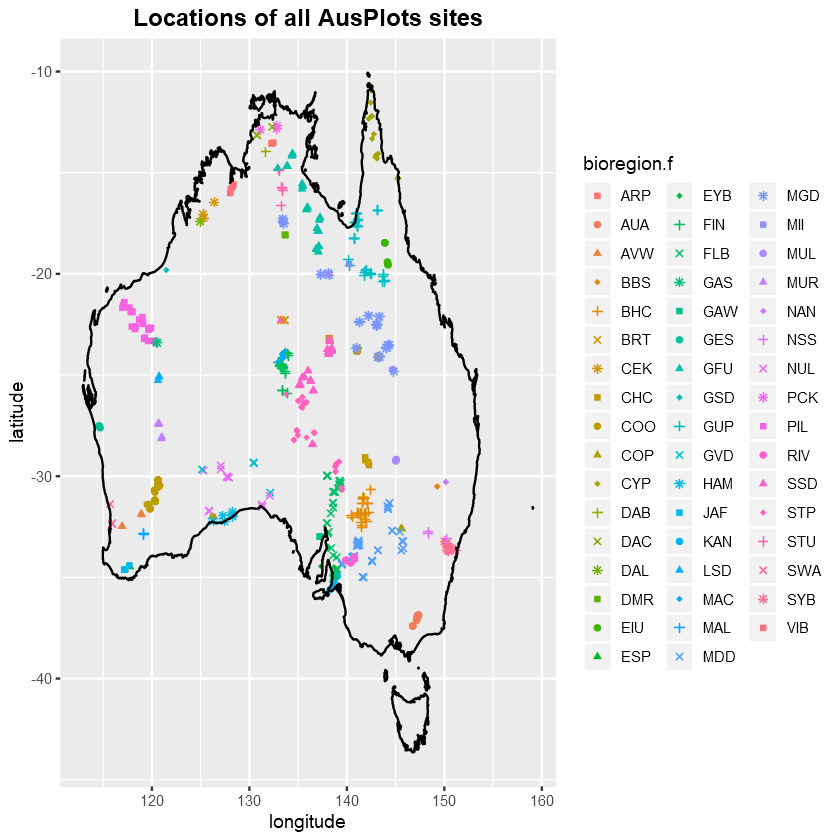

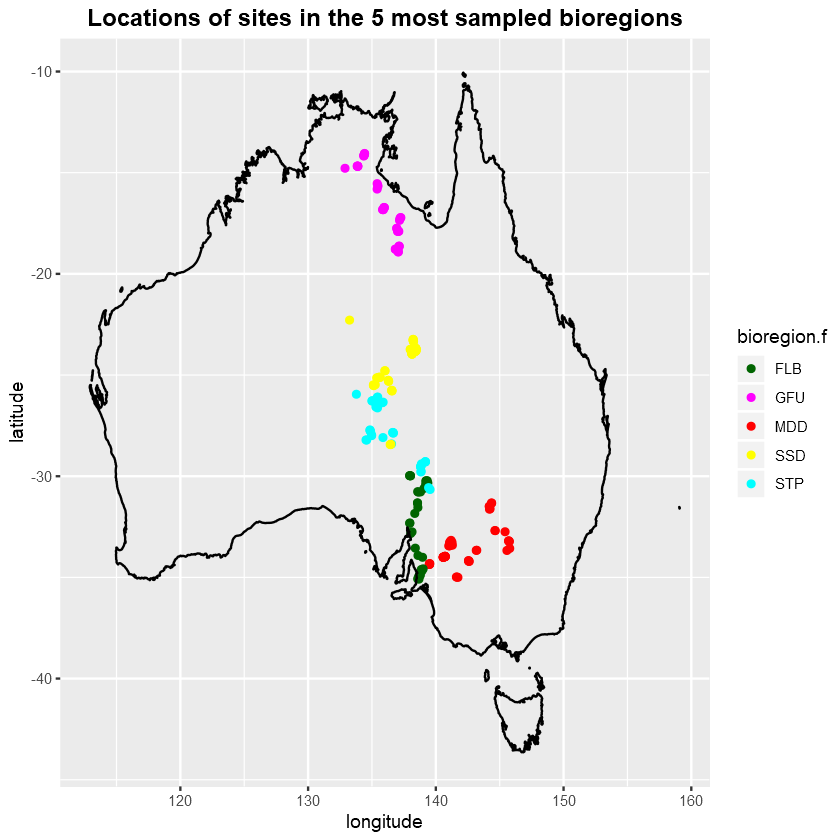

In [8]:

#----------------------------------------------------------------------------------------
# Get and Prepare a Map of Australia
#----------------------------------------------------------------------------------------

# Maps in the package 'maps' are projected in longlat by default
aus = map("worldHires", "Australia", fill=TRUE, xlim=c(110,160),ylim=c(-45,-5), mar=c(0,0,0,0), plot=FALSE)

# Convert map data to SpatialPolygons
#aus.sp = map2SpatialPolygons(aus, IDs=aus$names, proj4string=CRS("+proj=longlat"))
CRS("+init=epsg:4326") # More info (i.e. provides a datum)
aus.sp = map2SpatialPolygons(aus, IDs=aus$names, proj4string=CRS("+init=epsg:4326"))


#----------------------------------------------------------------------------------------
# Plot All AusPlots Sites on a Map of Australia
#----------------------------------------------------------------------------------------

# We well use 7 distinct symbol shapes to represent the AusPlots Sites (combined with 
# different colors). We will cycle through the 7 symbol shapes. We start by creating a
# vector of with symbol shapes codes as long as the number of bioregions in the current 
# version of the AusPlots dataset, cycling among the 7 shapes. What complicates this 
# process a bit is that the number of bioregions sampled changes with time, as additional 
# sites in different bioregions are sampled. Thus, we need to estimate the required number 
# of cycles of symbol shapes from the data. To do this we use the function ceiling, and 
# the cut back to the required number of symbol shapes as we might not need full cycles 
# (i.e. the number of sites might not be a multiple of 7; e.g. 50 sites require more than
# 7 cycles, so we use 8 and then trimm the vector from 56 (7 shapes * 8 cycles) to 50.

# Preparation: Create a vector with the symbol shapes values
bioregions.cnt = length(levels(AP.data$site.info$bioregion.f))
shape.cycles.num = ceiling(bioregions.cnt / 7) #  Using 7 distinct Symbol Shapes
sites.shape.values = rep(c(15:18,3:4,8),shape.cycles.num)[1:bioregions.cnt]

# Create Plot
ggplot( data=AP.data$site.info, 
		     aes(x = longitude, y = latitude, group=bioregion.f), alpha =0.5) + 
geom_point(aes(colour=bioregion.f, fill=bioregion.f, shape=bioregion.f), size=1.5) + 
scale_shape_manual(values=sites.shape.values) +  # Cycle through Symbol Types 
ggtitle("Locations of all AusPlots sites") + 
theme(plot.title = element_text(hjust = 0.5, face="bold", size=14)) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)


#----------------------------------------------------------------------------------------
# Plot AusPlots sites in the 5 Bioregions on Map of Australia
#----------------------------------------------------------------------------------------
ggplot(data=AP.BioregTop5.l$site.info, aes(x = longitude, y = latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(pch=21, size=1.5) + scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle("Locations of sites in the 5 most sampled bioregions") + 
theme(plot.title = element_text(hjust = 0.5, face="bold", size=14)) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)



### SPECIES-LEVEL DATA: `species_table` function and species occurence matrices 

 In this section, we will explore to how to obtain and use species occurrence data from AusPlots raw data. In particular, we will examine species cover/abundance, species presence/absence, multiple indices of species diversity, and rank-abundance plots for the sites in the 5 most sampled bioregions. 

#### First step: Create a species occurence matrix

 The first step to work with species-level AusPlots data is to create a species occurrence matrix. The `species_table` function in the `ausplotsR` package can be used to effortlessly create this type of matrix. This function takes a data frame of individual raw point intercept hits (i.e. a `veg.PI` data frame) generated using the `get_ausplots` function and returns a 'species against sites' matrix. Four metrics can be selected to score species occurrence: 
 
  * _Presence/Absence_ (argument `m_kind = PA`).
  * _Percent Cover_: Based on total frequency of hits. This is the most commonly used metric  (argument `m_kind = percent_cover`).
  * _Frequency_: Based on proportional frequencies of presence on the 10 individual transects within a plot  (argument `m_kind = freq`). It can be a measure of importance for low cover species.
  * _IVI_: A combination of cover and frequency  (argument `m_kind = IVI`).

 If Percent Cover or IVI are used two types of cover type can be selected:
 
  * _Projected Foliage Cover_ (_PFC_):Hits scored as 'in canopy sky' are removed  (argument `cover_type = PFC`). 
  * _Opaque Canopy Cover_ (_OCC_): Hits scored as 'in canopy sky' are retained  (argument `cover_type = OCC`). 


In [9]:

# Use function 'species_table' in 'ausplotsR' package to create an Abundance per Site Table
# =========================================================================================
SppBYSites.BioregTop5 = species_table(AP.BioregTop5.l$veg.PI, m_kind="percent_cover", cover_type="PFC")
class(SppBYSites.BioregTop5)
dim(SppBYSites.BioregTop5) # Number of rows and columns in the matrix: 574 Sites x 3024 Spp
SppBYSites.BioregTop5[1:5, 1:5]


# Enrich Table with: Site_Location, Bioregion, Latitude, and Longitude
# ====================================================================

# Create a 'site_unique' variable in Species by Sites Table to relate both datasets
# ---------------------------------------------------------------------------------
SppBYSites.BioregTop5$site_unique = rownames(SppBYSites.BioregTop5)										

# Both DF have differente number of rows!
dim(SppBYSites.BioregTop5)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
# -----------------------------------------------
SppBYSites.BioregTop5  = merge(SppBYSites.BioregTop5, AP.BioregTop5.l$site.info,                                          by="site_unique")[,c(names(SppBYSites.BioregTop5), 
                                          "bioregion.f", "longitude", "latitude")]
SppBYSites.BioregTop5 = na.omit(SppBYSites.BioregTop5)
#head(SppBYSites.BioregTop5)
#summary(SppBYSites.BioregTop5)
head(names(SppBYSites.BioregTop5))


[1] "data.frame"

[1]  209 1124

,Abutilon.fraseri,Abutilon.halophilum,Abutilon.otocarpum,Abutilon.sp.,Acacia.adoxa
NSAMDD0001-56965,0,0,0,0,0
NSAMDD0002-56952,0,0,0,0,0
NSAMDD0003-56968,0,0,0,0,0
NSAMDD0004-56953,0,0,0,0,0
NSAMDD0005-56969,0,0,0,0,0


[1]  209 1125

[1] 215  44

[1] "Abutilon.fraseri"    "Abutilon.halophilum" "Abutilon.otocarpum" 
[4] "Abutilon.sp."        "Acacia.adoxa"        "Acacia.alleniana"


#### Species Abundance

 In AusPlots data percent cover is used as a measure of abundance. In this section, we will examine percent cover by:

  * Site visit and species: That is, all cells in the 'Species by Sites' table. 
  * Species: By computing the column totals in the 'Species by Sites' table. 

#####  Percent Cover (Abundance) by Site Visit x Species


[1]  0.00000 81.18812

Abutilon.fraseri1 Abutilon.fraseri2 Abutilon.fraseri3 Abutilon.fraseri4 
                0                 0                 0                 0 
Abutilon.fraseri5 Abutilon.fraseri6 
                0                 0

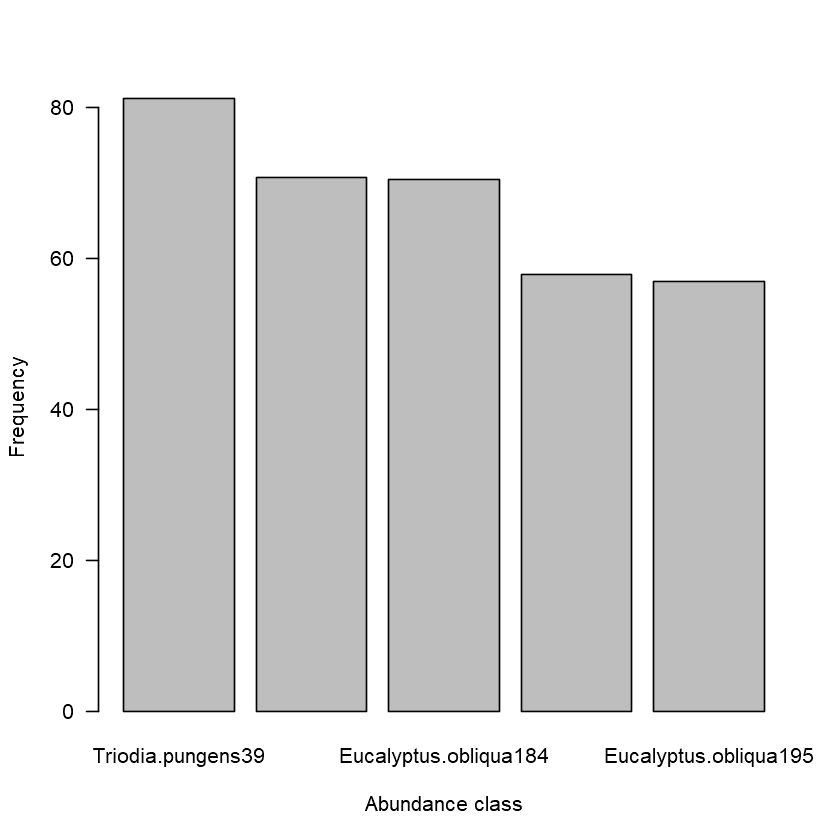

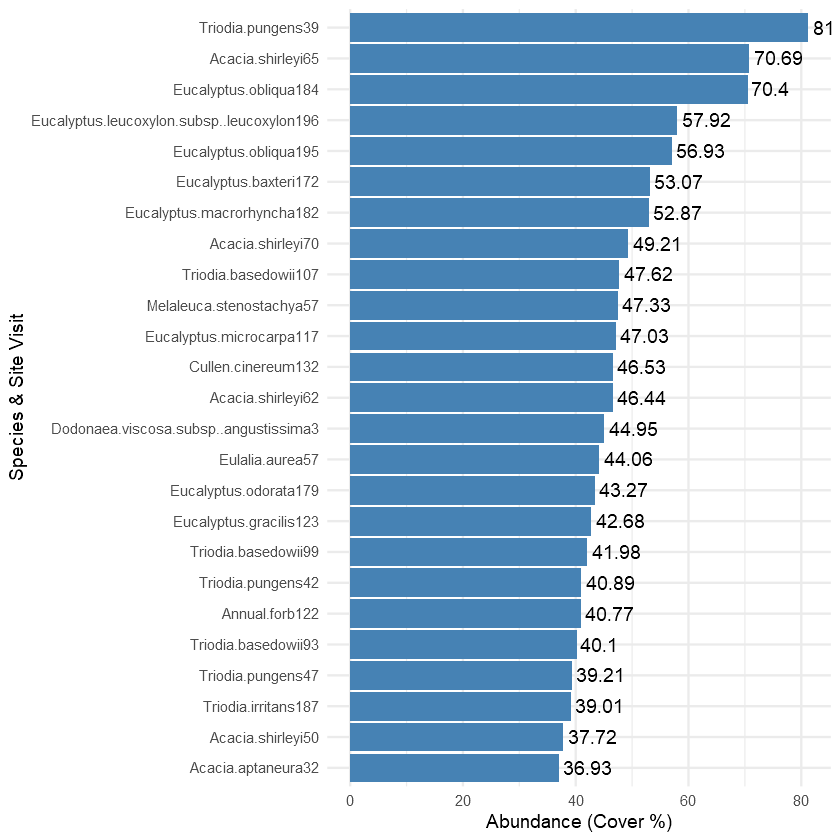

In [10]:

# Minimum and Maximum Site Visit x Species Abundance values
# ---------------------------------------------------------
# '-4' because we added 4 new columns (Plot, bioregion.f, longitude, and latitude)##
range(SppBYSites.BioregTop5[,1: (dim(SppBYSites.BioregTop5)[2]-4)])

# Plot Highest  Site Visit x Species Abundance values
# ---------------------------------------------------
Abundance = unlist(SppBYSites.BioregTop5[,1: (dim(SppBYSites.BioregTop5)[2]-4)])
head(Abundance)
#length(Abundance)
#dim(SppBYSites.BioregTop5)

# Plot the 5 Site Visits x Species combination with the Highest Abundances
par(mfrow=c(1,1))
barplot(sort(Abundance, decreasing=TRUE)[1:5], las=1, xlab="Abundance class", ylab="Frequency")

# ggplot2 graph to make it look nicer. Now we plot the 25 species-site visit covers with horizontal bars
temp.labs = names(sort(Abundance, decreasing=TRUE))
temp.Abundances = sort(Abundance, decreasing=TRUE)
temp.df = data.frame(temp.Abundances, temp.labs)
# Order factor levels so that bars are sorted by Abundance in the plot. Otherwise they would plotted in alphabetical order
# 'rev' to plot bars in decreasing order (i.e. larger bar at top; otherwise larger bar at bottom)
temp.df$temp.labs = factor(temp.df$temp.labs, levels=rev(temp.df$temp.labs))
ggplot(data=temp.df[1:25,], aes(x=temp.labs, y=temp.Abundances)) + 
geom_bar(stat="identity", fill="steelblue") +
geom_text(aes(label=round(temp.Abundances,2)), hjust=-0.1, size=4)+
labs(x="Species & Site Visit", y="Abundance (Cover %)") + 
theme_minimal() + coord_flip()
# Cleaning up
rm(list=ls(pattern="temp."))



#####  Abundance (Cover %) by Species

Now we compute the percent cover of all species across the sites in the 5 most sampled bioregions. Then we find and plot on a map of Australia the 4 most Abundant species in the 
5 regions (across all regions pooled together).


Abutilon.fraseri Abutilon.halophilum  Abutilon.otocarpum        Abutilon.sp. 
          0.1980198           1.3861386           2.2787055           0.5944519 
       Acacia.adoxa    Acacia.alleniana 
          0.4950495           1.1881188

[1] 321.4717

Triodia.basedowii 
             1066

Triodia.basedowii     Triodia.bitextura Schizachyrium.fragile 
             321.4717              283.4677              256.2688 
      Triodia.pungens 
             251.6832

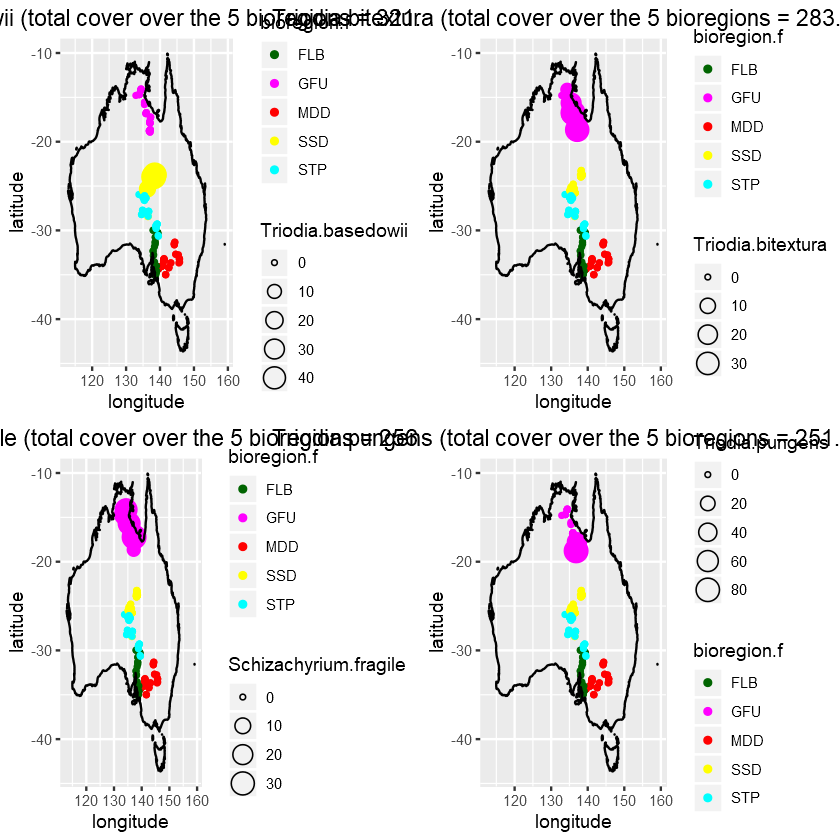

In [11]:

# Compute Species Total Abundance (Cover %)
# -----------------------------------------
TotAbundances.BioregTop5 = colSums(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)])
head(TotAbundances.BioregTop5)

# Species with Highest Total Abundance 
# ------------------------------------
# Species with Highest Total Abundance
max(TotAbundances.BioregTop5)
which.max(TotAbundances.BioregTop5)
# Species with Top 4 Highest Abundances
TotAbundances4Highest.indices = 
     which(TotAbundances.BioregTop5 >= sort(TotAbundances.BioregTop5, decreasing=T)[4],               arr.ind=T)
sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE)

# Plot 4 Species with Highest Cover in the 5 Most Sampled Bioregions
# ------------------------------------------------------------------

# Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                                   decreasing=TRUE))[1]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                                   decreasing=TRUE)[1],2) , ")", sep="")
TotAbundance.spp1 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA) 

# 2nd Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                                   decreasing=TRUE))[2]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                              decreasing=TRUE)[2],2) , ")", sep="")
TotAbundance.spp2 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# 3rd Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                                   decreasing=TRUE))[3]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                              decreasing=TRUE)[3],2) , ")", sep="")
TotAbundance.spp3 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# 4th Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                              decreasing=TRUE))[4]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices],                              decreasing=TRUE)[4],2) , ")", sep="")
TotAbundance.spp4 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Plot the 4 Graphs
grid.arrange(TotAbundance.spp1, TotAbundance.spp2, TotAbundance.spp3, TotAbundance.spp4, nrow=2)



#### Species Occurrence (Presence/Absence)
 
 We next focus on species occurrence data; that is, whether as species is Present/Absent. We can compute Presence/Absence data in several ways:
 
 * Re-use the 'percent cover' data we used above: If percent cover is > 0 then the species is present, if percent cover = 0 then the species is absent. 
 * Use the `species_table` function with the argument `m_kind = PA` on the data frame with raw point intercept data (i.e. `veg.PI`) generated by the function `get_auplots`.
 * Use the `species_table` function with the argument `m_kind = PA` on the data frame with vegetation vouchers data (a complete set of species records for the plot determined by a herbarium; i.e. `veg.vouchers`) generated by the function `get_auplots`. This option provides the most complete species inventories by sites.
 
 Here we use the first option for simplicity and generality (i.e. how these tasks can be performed with other abundance data outside AusPlots). As for the Abundance/Percent Cover data, we first examine species occurrence across all cells (i.e. combinations of site visits and species), and then investigate and plot the total number of (absolute and relative) occurrences for each species. 


[1] 4002

[1] 230914

[1] 0.01703588

[1] 0.9829641

[1] "Abutilon.fraseri"    "Abutilon.halophilum" "Abutilon.otocarpum" 
[4] "Abutilon.sp."        "Acacia.adoxa"        "Acacia.alleniana"

Annual.forb          Annual.grass       Dead.tree.shrub 
                  106                    89                    49 
      Sida.fibulifera    Aristida.holathera Schizachyrium.fragile 
                   39                    36                    31

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


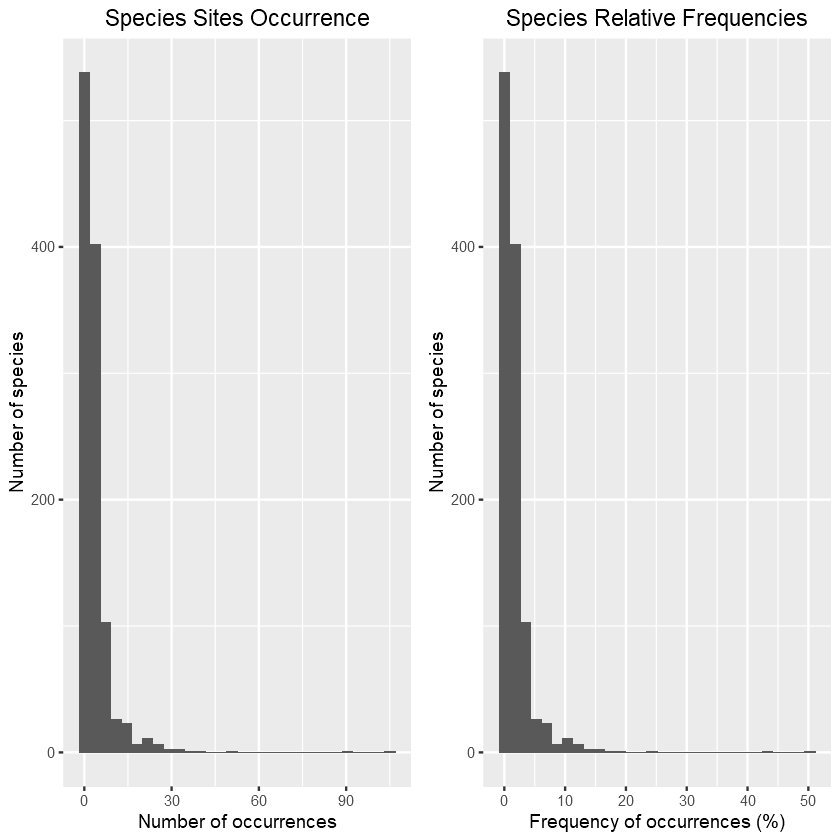

In [12]:

# Presence/Absence across all Cells (i.e. Site Visit x Species)
# =============================================================

# Absolute Presences/Absences
# ---------------------------
 # Number of Presences
sum(Abundance > 0)
 # Number of Absences
sum(Abundance == 0)

# Relative (%) Presences/Absences
# -------------------------------
num.cells = (nrow(SppBYSites.BioregTop5[1: (dim(SppBYSites.BioregTop5)[1]-3)]) * ncol(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)]))
 # % of Presences
sum(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)] > 0)/ num.cells 
 # % of Absences
sum(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)] == 0) / num.cells


# Total Presence/Absence  for each Species (i.e. per data frame Column)
# =====================================================================

# Compute number of sites where each species is present (sum by columns)
head(names(SppBYSites.BioregTop5)) # Species are in columns
SppPres.BioregTop5 = apply(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)]>0, 2,sum)

# Sort results in increasing order
head(sort(SppPres.BioregTop5, decreasing = TRUE))

# Compute Percentage Frequencies
SppRelFreq.BioregTop5 =  SppPres.BioregTop5 * 100 / nrow(SppBYSites.BioregTop5)

# Plot Species Frequencies
par(mfrow=c(1,1))
spp.freq.p1 = ggplot() + geom_histogram(aes(SppPres.BioregTop5)) + 
              ggtitle("Species Sites Occurrence") + 
			  theme(plot.title = element_text(hjust = 0.5)) +
			  xlab("Number of occurrences") + ylab("Number of species")
spp.freq.p2 = ggplot() + geom_histogram(aes(SppRelFreq.BioregTop5)) + 
              ggtitle("Species Relative Frequencies") + 
			  theme(plot.title = element_text(hjust = 0.5)) +
			  xlab("Frequency of occurrences (%)") + ylab("Number of species")
grid.arrange(spp.freq.p1, spp.freq.p2, ncol=2)


 
#### Species Diversity

  On our exploration of the use of Species-lelvel AusPlots data, we now focus on Species Diversity. We first compute 7 common diversity indices, which we then place in a dataset. Finally, as an example, we plot two of these indices (Species Richness and Shanon Diversity Index) for the sites in the 5 most sampled bioregions on a map of Australia. 
  
NOTE: Diversity indices were originally designed to be used with counts of number of individuals per species, rather than percent cover, as a measure of abundance. These indices are also used with percent cover in the literature (see Tomasckik and Sander, 1987 for an example using coral cover). We need, however, to be aware of the different kind of answers and interpretation of the results required. 


       N0              H               N1               N2        
 Min.   : 1.00   Min.   :0.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:14.00   1st Qu.:1.410   1st Qu.: 4.096   1st Qu.: 2.830  
 Median :19.00   Median :1.802   Median : 6.060   Median : 4.222  
 Mean   :19.15   Mean   :1.802   Mean   : 7.043   Mean   : 4.748  
 3rd Qu.:24.00   3rd Qu.:2.199   3rd Qu.: 9.017   3rd Qu.: 6.054  
 Max.   :43.00   Max.   :3.103   Max.   :22.257   Max.   :15.240  
                                                                  
       E1                E2                J          bioregion.f
 Min.   :0.08624   Min.   :0.05508   Min.   :0.1727   FLB:33     
 1st Qu.:0.26863   1st Qu.:0.17411   1st Qu.:0.5492   GFU:41     
 Median :0.35678   Median :0.23550   Median :0.6468   MDD:50     
 Mean   :0.38136   Mean   :0.26790   Mean   :0.6288   SSD:46     
 3rd Qu.:0.46065   3rd Qu.:0.32104   3rd Qu.:0.7297   STP:39     
 Max.   :1.00000   Max.   :1.00000   Max.   :0.9610              
  

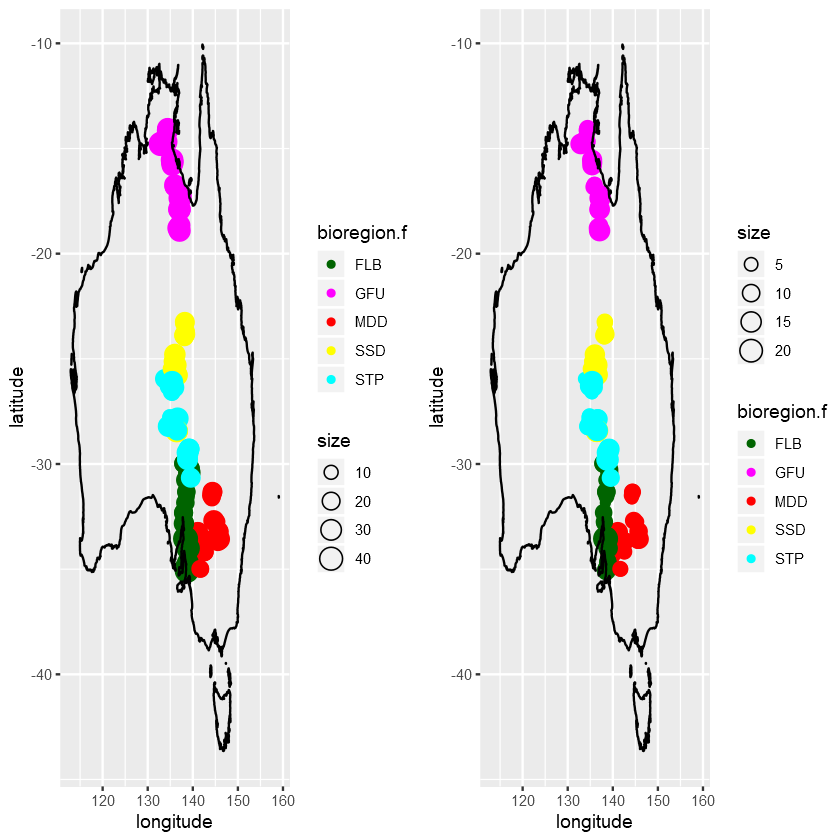

In [13]:

# Compute and place in a DF the Species Diversity Indices
# =======================================================

# Species Richness
N0 = rowSums(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)] > 0)
# Shannon Entropy
H = diversity(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)])
# Shannon Diversity Index
N1 = exp(H)
# Simpson Diversity Index
N2 = diversity(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)], "inv")
# Shannon Evenness (Hill's ratio)
E1 = N1/N0
# Simpson Evenness (Hill's ratio)
E2 = N2/N0
# Pielou Evenness
J = H/log(N0)

# Create a Data Frame with the Species Diversity Indices
SppBYSites.BioregTop.Div.df = data.frame(N0, H, N1, N2, E1, E2, J)


# Map Species Richness and Shannon Diversity Index (as an example)
# ================================================================

# Add extra info to DataFrame (Bioregions, longitude, and latitude)
SppBYSites.BioregTop.Div.df$bioregion.f = SppBYSites.BioregTop5[rownames(SppBYSites.BioregTop.Div.df),"bioregion.f"]
SppBYSites.BioregTop.Div.df$longitude = SppBYSites.BioregTop5[rownames(SppBYSites.BioregTop.Div.df),"longitude"]
SppBYSites.BioregTop.Div.df$latitude = SppBYSites.BioregTop5[rownames(SppBYSites.BioregTop.Div.df),"latitude"]
summary(SppBYSites.BioregTop.Div.df) 

# Create Species Richness Plot
Div.SR = 
ggplot(data=SppBYSites.BioregTop.Div.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=N0), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Create Shanon Diversity Index Plot
Div.ShannonIndex = 
ggplot(data=SppBYSites.BioregTop.Div.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=N1), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Plot the 2 graphs
grid.arrange(Div.SR, Div.ShannonIndex, ncol=2)



#### Rank-Abundance Curves & Relative Abundance Models

 For the final example of downstream visualisation and analysis of Species-level AusPlots data, we focus on Rank-Abundance Curves (also known as Whittaker Plots). Rank-Abundance Curves provide further information on species diversity. They provide a more complete picture than a single diversity index. Their x-axis represents the abundance rank (from most to least abundant) and in the y-axis the species relative abundance. Thus, they depict both Species Richness (number of different in ranked) and Species Evenness (slope of the line that fits the rank; steep gradient indicates low evenness and a shallow gradient high evenness). 
 
  In this section we:
  
  * We plot the Rank-Abundance Curves for the first 5 Site-Visits in our 5 most sampled bioregions dataset.
  * We show a quick example of the fitting of possible Models of Relative Abundance for one Community.
  * We compute the mean cover for each species in the 5 most sampled Bioregions and then plot the Rank-Abundance Curves for the 5 Bioregions. 


[1] "FLB" "GFU" "MDD" "SSD" "STP"

[1] "SppCover.GFU.Mean" "SppCover.MDD.Mean" "SppCover.PIL.Mean"
[4] "SppCover.SSD.Mean" "SppCover.STP.Mean"

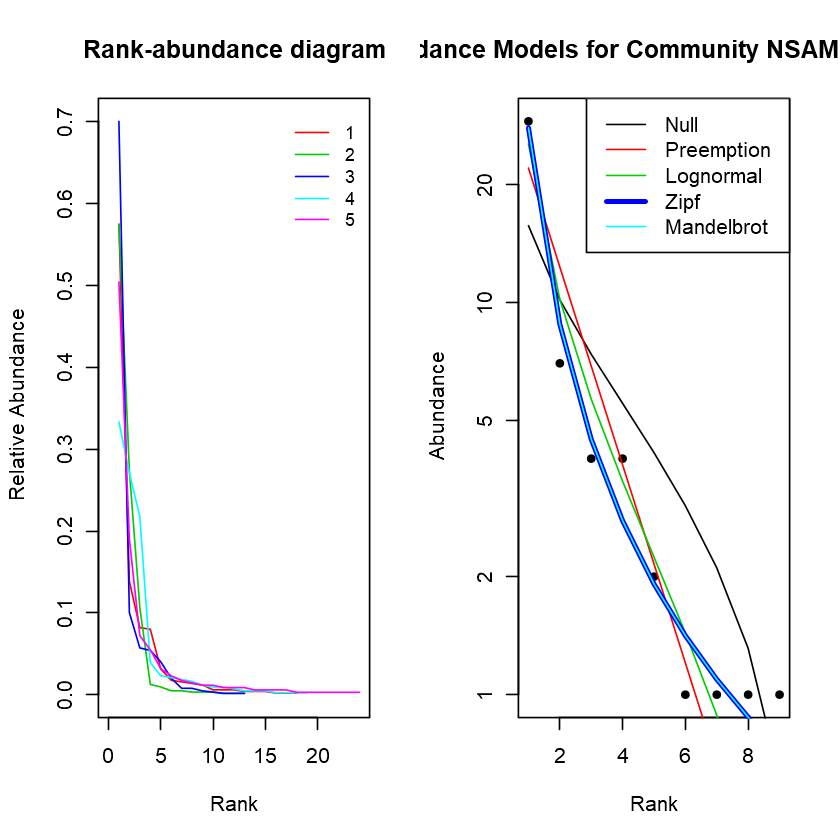

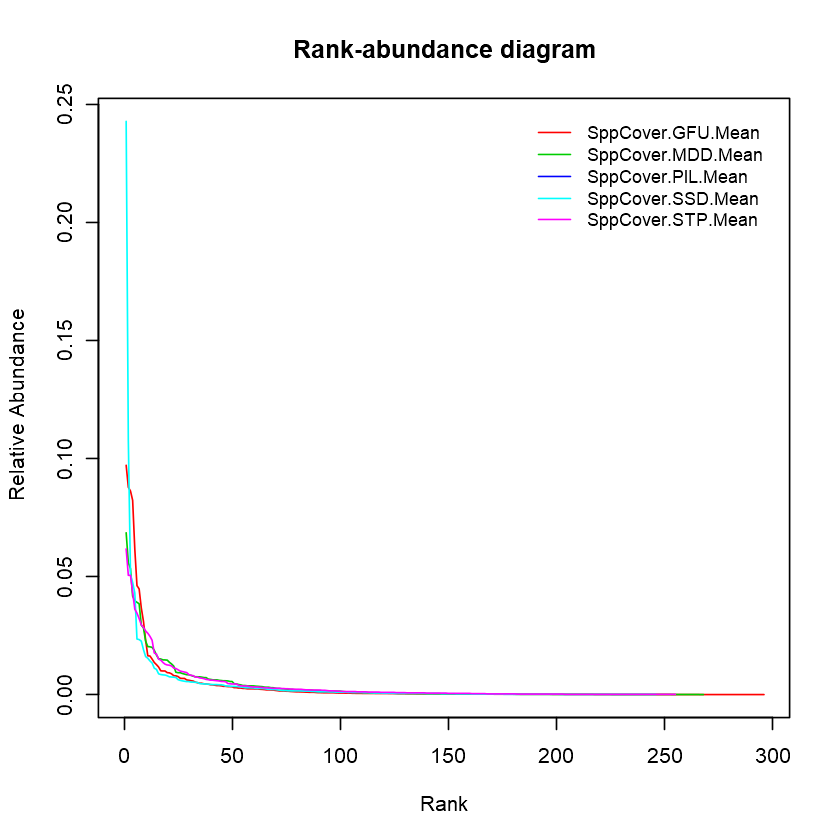

In [14]:

par(mfrow=c(1,2))

# Rank-Abundance Curves (= Whittaker Plots) for the First 5 Site-Visits
# =====================================================================
goeveg::racurves(SppBYSites.BioregTop5[1:5,1:(dim(SppBYSites.BioregTop5)[2]-4)], bw=F)


# Possible Models of Relative Abundance for one Community
# =======================================================
plot(vegan::radfit(round(SppBYSites.BioregTop5[1,1:(dim(SppBYSites.BioregTop5)[2]-4)], digits=0), log="xy"),
     pch=20, main="Rel. Abundance Models for Community NSAMDD0001-56965")


# Rank-Abundance Curves (= Whittaker Plots) for each Bioregion (using the Spp. Mean Cover)
# ======================================================================================== 

# Compute Species Mean Cover for each of the 5 most sampled Bioregions
levels(SppBYSites.BioregTop5$bioregion.f)
 # GFU
SppCover.GFU.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="GFU",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.GFU.Mean)
 # MDD
SppCover.MDD.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="MDD",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.MDD.Mean)
 # PIL
SppCover.PIL.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="PIL",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.PIL.Mean)
 # SSD
SppCover.SSD.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="SSD",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.SSD.Mean)
 # STP
SppCover.STP.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="STP",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.STP.Mean)

# Create a Matrix with Species Means per Bioregion
SppCover.BioregionMean.m = rbind(SppCover.GFU.Mean, SppCover.MDD.Mean, SppCover.PIL.Mean, SppCover.SSD.Mean, SppCover.STP.Mean)
rownames(SppCover.BioregionMean.m)

# Rank-Abundance Curves (= Whittaker Plots) for the Species Cover Mean in each of the 5 Bioregions
par(mfrow=c(1,1))
goeveg::racurves(SppCover.BioregionMean.m, bw=F)



### PROPORTIONAL VEGETATION COVER (= FRACTIONAL COVER): `fractional_cover' function

 Fractional Cover (FC) is the proportional cover of green vegetation, dead vegetation and bare substrate, based on plot-based point intercept data from AusPlots (as generated by 'get_ausplots'). 

 Cover fractions are assigned according to the following: 
 
 * 'Green' or 'photosynthetic vegetation' is living vascular plant cover. 
 * 'Brown' or 'non-photosynthetic vegetation' is either vascular plant cover scored as 'dead' or substrate scored as litter, coarse woody debris or cryptogam (see below) that has no other veg cover. 
 * 'Bare' or 'bare ground' is substrate that is rock, outcrop, gravel or bare soil with no veg cover. 

 A height rule is applied so that coding to green/brown/bare of the uppermost substrate/vegetation stratum hit at a given point intercept location overrides the others, that is, a dead tree overrides a living shrub beneath and vice versa; substrate coding is overridden by any vegetation cover etc. This means for each of the (usually) 1010 intercepts, there is a single coding and percentage is the number of hits assigned to each fraction, divided by the total number of PIs taken (usually 1010 but can vary) times 100. 

 There is an option via argument 'ground_fractional' to calculate fractional ground cover - the same concept applied to only grasses (hummock, tussock, other); sedge; rush; forb; fern; and vine plant growth forms. Presently, cryptogam cover is excluded and included in the non-photosynthetic fraction. 

 'In canopy sky' is excluded by default (only the substrate is considered for those hits) and applies only to regular fractional cover (as trees are excluded in the green fraction for ground fractional cover by default). 

 Currently, cryptogam substrate is assigned to the non-photosynthetic fraction. 

 Occasionally substrate type was not collected ('NC') or could not be assigned to one of the above categories ('Unknwn'), in which case a percent cover will be returned under an 'NA' fraction if there was no veg cover above those points. 

 The function `fractional_cover`returns a data frame in which plots are rows, columns are fractions (bare, brown, green and NA) and values are percent cover. 


 In this section we will explore: 
 
  * The Latitudinal Pattern in Proportional Vegetation Cover (for a random subest of 200 sites).
  * Temporal Variation in fractional cover: Explore, display, and assess (for 5 sites visited twice).


#### Latitudinal Pattern in Proportional Vegetation Cover

 In this seection we will follow these steps:
 
 * Call the `fractional_cover` function on the extracted point intercept data. This calculation may take a few minutes for all AusPlots, so for this example we will work with a random subset of 200 randomly drawn sites.
 * Plot the Latitudinal Pattern in Proportional Vegetation Cover (here we use the 'Proportion of Bare Ground'). To do this, we first enrich the dataset with additional variables including: 'Plot' (identifier for each Site-Visit combination), 'bioregion.f', 'longitude', and 'latitude'. 
 * Fit a Quadratic Model to the data and examine its Fit, as there appears to be a humpbacked relationship in the previous plot (higher proportionof bare ground in the arid inland at mid-latitudes). 


Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
"there are records with missing times, which will be dropped."

,site_unique,bare,brown,green,NA.
NSABHC0004-53599,NSABHC0004-53599,26.63,36.63,36.73,0.0
NSABHC0007-53602,NSABHC0007-53602,23.47,34.75,41.78,0.0
NSABHC0012-53607,NSABHC0012-53607,19.51,47.55,32.94,0.0
NSABHC0012-58022,NSABHC0012-58022,28.71,32.67,38.61,0.0
NSABHC0014-53609,NSABHC0014-53609,55.00,19.22,25.78,0.0
NSABHC0015-57104,NSABHC0015-57104,8.32,46.24,45.35,0.1


site_unique,bare,brown,green,NA.,bioregion.f,longitude,latitude
NSABHC0004-53599,26.63,36.63,36.73,0.0,BHC,141.9481,-31.84728
NSABHC0007-53602,23.47,34.75,41.78,0.0,BHC,141.7644,-31.90113
NSABHC0012-53607,19.51,47.55,32.94,0.0,BHC,141.7411,-31.07957
NSABHC0012-58022,28.71,32.67,38.61,0.0,BHC,141.7411,-31.07957
NSABHC0014-53609,55.00,19.22,25.78,0.0,BHC,141.5915,-31.33115
NSABHC0015-57104,8.32,46.24,45.35,0.1,BHC,141.0592,-31.83394


 site_unique             bare            brown           green      
 Length:218         Min.   : 0.100   Min.   : 1.49   Min.   : 2.08  
 Class :character   1st Qu.: 8.935   1st Qu.:21.88   1st Qu.:26.45  
 Mode  :character   Median :20.250   Median :29.95   Median :39.94  
                    Mean   :26.382   Mean   :31.17   Mean   :42.32  
                    3rd Qu.:41.583   3rd Qu.:40.99   3rd Qu.:55.40  
                    Max.   :94.060   Max.   :70.20   Max.   :95.74  
                                                                    
      NA.          bioregion.f    longitude        latitude     
 Min.   :0.0000   MDD    : 25   Min.   :114.7   Min.   :-37.10  
 1st Qu.:0.0000   SSD    : 20   1st Qu.:133.3   1st Qu.:-33.20  
 Median :0.0000   RIV    : 18   Median :138.2   Median :-28.27  
 Mean   :0.1287   MAC    : 17   Mean   :135.8   Mean   :-27.10  
 3rd Qu.:0.0000   FLB    : 14   3rd Qu.:140.8   3rd Qu.:-23.21  
 Max.   :6.3400   COO    : 11   Max.   :150.6   Max.   :-1

[1] "site_unique" "bare"        "brown"       "green"       "NA."        
[6] "bioregion.f" "longitude"   "latitude"


Call:
lm(formula = bare ~ latitude + I(latitude^2), data = AP.200Locs.FC)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.664 -11.516  -2.162   9.543  53.512 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -157.43229   18.33885  -8.585 1.84e-15 ***
latitude       -16.10531    1.49047 -10.806  < 2e-16 ***
I(latitude^2)   -0.32565    0.02896 -11.244  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.37 on 215 degrees of freedom
Multiple R-squared:  0.3852,	Adjusted R-squared:  0.3795 
F-statistic: 67.36 on 2 and 215 DF,  p-value: < 2.2e-16


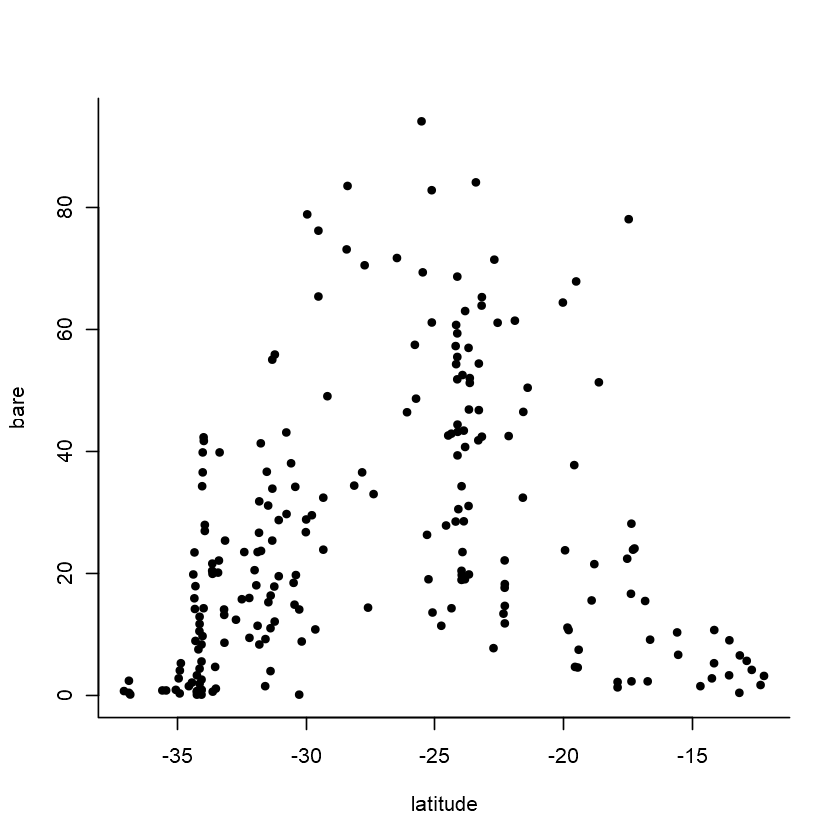

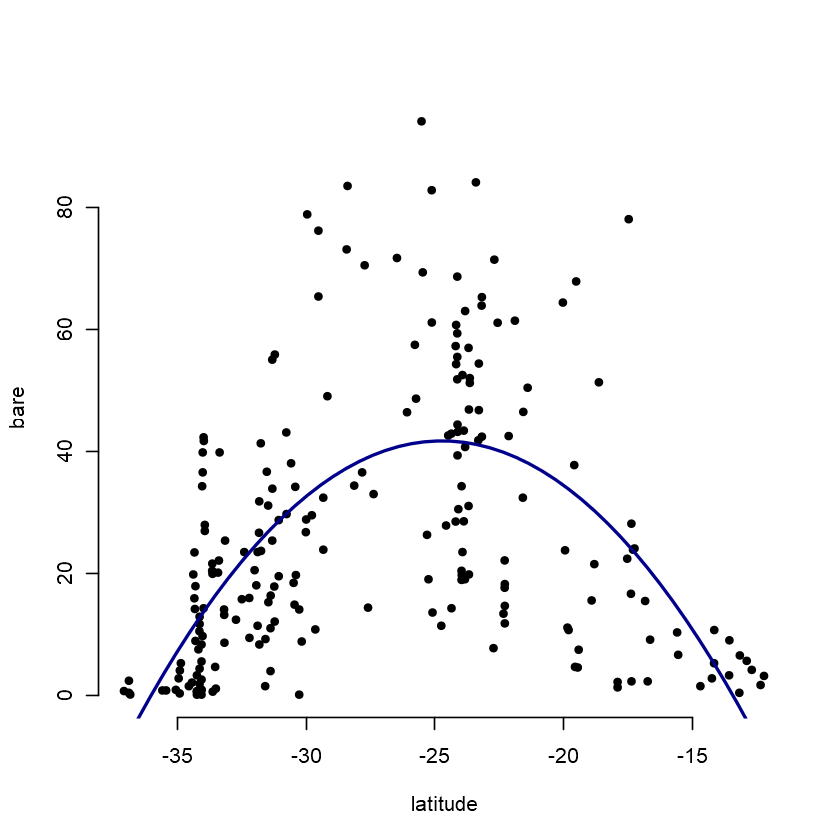

In [15]:

# First, we call the fractional_cover function on the extracted point intercept data. 
# NOTE: Calculation may take a few minutes for all AusPlots, so for this example 
# we will pull out a subset of 200 randomly drawn sites to work with. 
# The sets site composition will differ each time the script is run, 
# as they are random subsets. 


# Compute Fractional Cover using function 'fractional_cover`
# ---------------------------------------------------------
AP.200Locs.FC =
fractional_cover(AP.data$veg.PI[AP.data$veg.PI$site_location_name %in% 
				                        sample(AP.data$site.info$site_location_name, 200), ])
# To use the Full Data set substitute the command above by this one:
# fractional_cover(AP.data$veg.PI[AP.data$veg.PI$site_location_name %in% 
#                                 AP.data$site.info$site_location_name, ])  
#AP.200Locs.FC = na.omit(AP.200Loc.FC)
head(AP.200Locs.FC)


# Enrich with: Bioregion, Latitude, and Longitude
# -----------------------------------------------
AP.200Locs.FC  = merge(AP.200Locs.FC, AP.data$site.info, by="site_unique")[,c("site_unique", "bare", "brown", "green", "NA.", "bioregion.f", "longitude", "latitude")]
AP.200Locs.FC = na.omit(AP.200Locs.FC)
head(AP.200Locs.FC)
summary(AP.200Locs.FC)
names(AP.200Locs.FC)


# Plot out the continental relationship between Fractional Cover 
# --------------------------------------------------------------
# Here we use the 'Proportion of Bare Ground' & Latitude

# Plot the relationship between Proportion of Bare Ground (with no kind of vegetation cover above) and Latitude.
par(mfrow=c(1,1))
plot(bare ~ latitude, data=AP.200Locs.FC, pch=20, bty="l")


# Quadratic LM of Continental Relationship between Bare Ground Fractional Cover & Latitude
# ----------------------------------------------------------------------------------------

# Fit & Examine as Quadratic Linear Model the Continental Relationship between Bare Ground Fractional Cover & Latitude
AP.200Locs.FC.lm = lm(bare ~ latitude + I(latitude^2), data=AP.200Locs.FC)
summary(AP.200Locs.FC.lm)

# Predict values from Model Fit
pred.df = data.frame(latitude=seq(from=min(AP.200Locs.FC$latitude), to=max(AP.200Locs.FC$latitude), length.out=50))
pred.df$pred = predict(AP.200Locs.FC.lm, pred.df)

# Plot Predicted Values from Model Fit on Graph with Continental Relationship between Bare Ground Fractional Cover & Latitude
plot(bare ~ latitude, data=AP.200Locs.FC, pch=20, bty="n")
points(pred.df$latitude, pred.df$pred, type="l", lwd=2, col="darkblue")



#### Temporal Variation in Fractional Cover: Explore, display, and assess (for 5 sites visited twice)

In the second section on Fractional Cover, we first Identify Sites that have been sampled more than once over time (in the 5 most sampled bioregions). Then we visually compare the Temporal Variation in Fractional Cover in these sites using Piecharts. 


[1] 218

[1] 195   2

[1] 23  2

[1] 23

[1] 46  8

[1] "site_unique"      "bare"             "brown"            "green"           
[5] "NA."              "bioregion.f"      "longitude"        "latitude"        
[9] "visit_start_date"

[1] "QDASSD0002-53757.2014" "QDASSD0002-57622.2015" "QDASSD0004-56913.2014"
[4] "QDASSD0004-57624.2015" "QDASSD0005-56914.2014" "QDASSD0005-57625.2015"

site_unique,bare,brown,green,NA.,bioregion.f,longitude,latitude,visit_start_date,site_unique.Yr
QDASSD0002-53757,62.97,16.93,20.10,0.00,SSD,138.3897,-23.82772,2014-05-01T00:00:00,QDASSD0002-53757.2014
QDASSD0002-57622,40.69,29.50,29.80,0.00,SSD,138.3897,-23.82772,2015-04-16T00:00:00,QDASSD0002-57622.2015
QDASSD0004-56913,46.83,19.01,34.06,0.10,SSD,138.4338,-23.68013,2014-05-02T00:00:00,QDASSD0004-56913.2014
QDASSD0004-57624,19.80,36.63,43.56,0.00,SSD,138.4338,-23.68013,2015-04-16T00:00:00,QDASSD0004-57624.2015
QDASSD0005-56914,56.93,24.36,16.83,1.88,SSD,138.4410,-23.69444,2014-05-02T00:00:00,QDASSD0005-56914.2014
QDASSD0005-57625,31.02,38.06,30.91,0.00,SSD,138.4410,-23.69444,2015-04-26T00:00:00,QDASSD0005-57625.2015


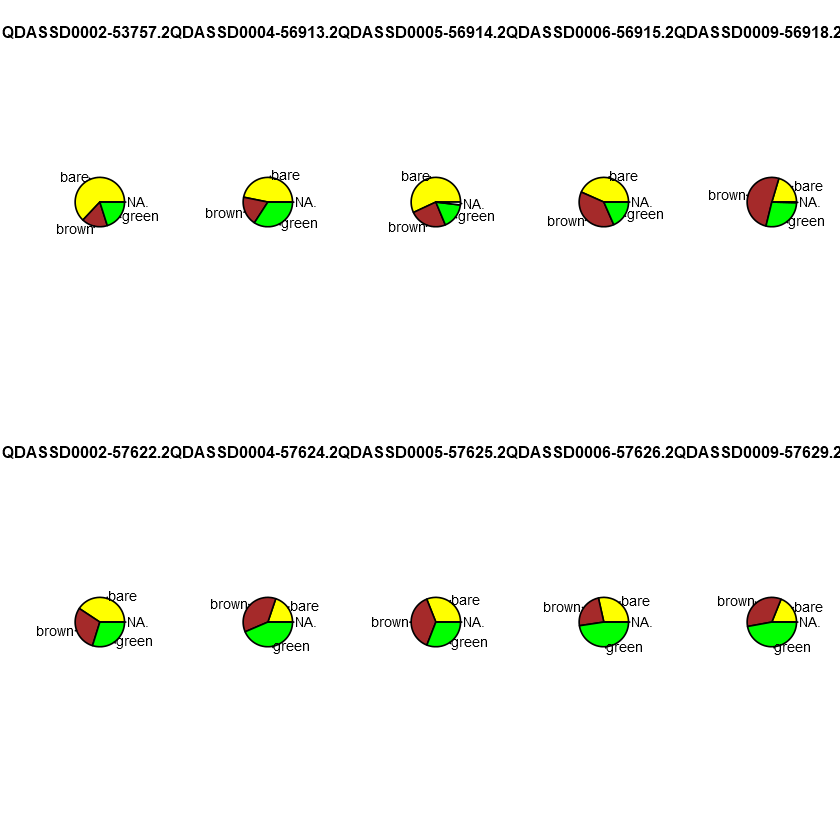

In [16]:

# Find Sites Sampled > 1 time
# ---------------------------
# Extract Sites Names
AP.200Locs.FC.locs = sub("\\-.*", "", AP.200Locs.FC$site_unique)
length(AP.200Locs.FC.locs)
# Calculate the Sample Frequency of each Site
AP.200Locs.FC.locs.cnt = count(AP.200Locs.FC.locs)
dim(AP.200Locs.FC.locs.cnt)
# Find Sites with > 1 Samples (in veg.IP)
AP.200Locs.FC.Resampled.locs.cnt = AP.200Locs.FC.locs.cnt[AP.200Locs.FC.locs.cnt$freq > 1,]
dim(AP.200Locs.FC.Resampled.locs.cnt)
AP.200Locs.FC.Resampled.locs.cnt = AP.200Locs.FC.Resampled.locs.cnt$x
length(AP.200Locs.FC.Resampled.locs.cnt)

# Subset the Resampled Sites (i.e. with 'freq' > 1)
# -------------------------------------------------
# Extract AP.200Locs.FC subset for Sites with > 1 Samples (in veg.IP)
AP.200Locs.FC.Resampled.Locs = AP.200Locs.FC[(AP.200Locs.FC.locs %in% AP.200Locs.FC.Resampled.locs.cnt),]
#AP.200Locs.FC.Resampled.Locs
dim(AP.200Locs.FC.Resampled.Locs) # 82 (= 41 * 2)

# Add Year (Started) Sampling of Site-Visit Pair
# ----------------------------------------------
# Need to specify 'AP.BioregTop5.l$site.info[,c("site_unique","visit_start_date")]' to avoid duplicate columns
AP.200Locs.FC.Resampled.Locs  = merge(AP.200Locs.FC.Resampled.Locs, AP.BioregTop5.l$site.info[,c("site_unique","visit_start_date")], 
														by="site_unique")[,c(names(AP.200Locs.FC.Resampled.Locs),                                                    "visit_start_date")]
names(AP.200Locs.FC.Resampled.Locs)
#AP.200Locs.FC.Resampled.Locs$visit_start_date
#substr(AP.200Locs.FC.Resampled.Locs$visit_start_date,1,4)
AP.200Locs.FC.Resampled.Locs$site_unique.Yr = paste( AP.200Locs.FC.Resampled.Locs$site_unique,  
											  substr(AP.200Locs.FC.Resampled.Locs$visit_start_date,1,4),
											  sep="." )
head(AP.200Locs.FC.Resampled.Locs$site_unique.Yr)

# Plot Pies for the first 5 Resampled Sites -out of 41- (i.e. 10 Site-Visit pairs)
# --------------------------------------------------------------------------------
# Order dataframe to Plot Site-Visit pairs in the appropriate order
AP.200Locs.FC.Resampled.Locs = AP.200Locs.FC.Resampled.Locs[order(AP.200Locs.FC.Resampled.Locs$site_unique),]
head(AP.200Locs.FC.Resampled.Locs)
# Plot the Site-Visit pairs
par(mfcol=c(2,5))
for (site.visit.cnt in 1:10) {

	pie( x=as.numeric(AP.200Locs.FC.Resampled.Locs[site.visit.cnt,2:5]), 
	     col=c("yellow", "brown", "green", "white"), 
         labels=names(AP.200Locs.FC.Resampled.Locs[2:5]),
		 main=as.character(AP.200Locs.FC.Resampled.Locs[site.visit.cnt,"site_unique.Yr"]) )

}  # for site.visit.cnt in 1:20 {



### GROWTH FORM: `growth_form_table` function (for 5 most sampled bioregions)

The `growth_form_table` function in the `ausplotR` package can be  used to generate occurrence matrices for NVIS plant growth forms in plots. The input for this function is a data frame of raw point intercept AusPlots data generated using the `get_ausplots` function. Three metrics can be selected to score species growth form: 

  * _Presence/Absence_ (argument `m_kind = PA`).
  * _Percent Cover_: Based on total frequency of hits (argument `m_kind = percent_cover`). This is the most useful and commonly used metric. It can be subsequently used in statistical analyses (e.g. MANOVA, Ordination, Classification, etc.)at continental scale where species turnover is too high for some methods to provide meaningful results. 
  * _Species Richness_: (argument `m_kind = richness`). Note that when m_kind is set to "richness" the `rowSums` of the occurrence matrix can be higher than the observed SR because sometimes the same species is recorded with different growth forms in a plot and therefore the same species can count towards the weights for multiple growth forms.

 If Percent Cover is used two types of cover type can be selected:
 
  * _Projected Foliage Cover_ (_PFC_):Hits scored as 'in canopy sky' are removed  (argument `cover_type = PFC`). 
  * _Opaque Canopy Cover_ (_OCC_): Hits scored as 'in canopy sky' are retained  (argument `cover_type = OCC`). 

 In this section we will:
 
 * Generate a Plant Growth Forms Percent Cover against Sites Matrix using the  `growth_form_table` function. 
 * Enrich this Matrix with additional information (plot -site-visit-, bioregion, longitude, and latitude).
 * Compute Summary Statics for each of the Growth Forms in the 5 most sampled Bioregions (slightly different to those produce by the `summary` function in the `base` package.
 * Cluster (Hierachical Clustering) the Sites-Visits by Plant Growth Forms Percent Cover, colouring the resulting tree branches by bioregion.

CLUSTERING RESULTS:

 * The first Site-Visit (NTAGFU0007-53654) is very different to the rest
 * The dendrogram shows clusters formed by single Bioregions at low level; however, at higher-level clusters are composed by Sites-Visits from different Bioregions. 


[1] 209  16

,Bryophyte,Chenopod,Epiphyte,Fern,Forb,Fungus,Hummock.grass,NC,Rush,Sedge,Shrub,Shrub.Mallee,Tree.Mallee,Tree.Palm,Tussock.grass,Vine
NSAMDD0001-56965,0,19.537815,0.0000000,0,83.1932773,0.4201681,0.00000,2.7310924,0,0,0.0000000,0.0000000,0.0000000,0.000000,1.8907563,0
NSAMDD0002-56952,0,3.024911,0.0000000,0,0.1779359,0.0000000,31.13879,0.0000000,0,0,1.6014235,0.5338078,76.8683274,0.000000,0.3558719,0
NSAMDD0003-56968,0,24.635036,0.0000000,0,9.3065693,0.0000000,0.00000,0.0000000,0,0,82.8467153,0.0000000,0.3649635,1.094891,0.0000000,0
NSAMDD0004-56953,0,45.194805,0.0000000,0,31.9480519,0.0000000,0.00000,0.0000000,0,0,5.1948052,0.0000000,0.0000000,28.831169,1.0389610,0
NSAMDD0005-56969,0,12.923077,0.0000000,0,12.0000000,0.0000000,0.00000,0.9230769,0,0,4.0000000,0.0000000,76.6153846,0.000000,0.3076923,0
NSAMDD0006-56954,0,79.945799,0.2710027,0,3.2520325,0.0000000,0.00000,0.0000000,0,0,0.8130081,0.0000000,0.0000000,32.249322,0.5420054,0


[1] 209  17

[1] 215  44

   Bryophyte          Chenopod          Epiphyte            Fern        
 Min.   :0.00000   Min.   :  0.000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.:0.00000   1st Qu.:  0.000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median :0.00000   Median :  1.953   Median : 0.0000   Median : 0.0000  
 Mean   :0.02634   Mean   : 14.989   Mean   : 0.1254   Mean   : 0.2112  
 3rd Qu.:0.00000   3rd Qu.: 23.913   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :5.50459   Max.   :100.000   Max.   :14.2857   Max.   :11.1253  
      Forb            Fungus        Hummock.grass          NC         
 Min.   : 0.000   Min.   :0.00000   Min.   :  0.00   Min.   :0.00000  
 1st Qu.: 2.674   1st Qu.:0.00000   1st Qu.:  0.00   1st Qu.:0.00000  
 Median : 7.959   Median :0.00000   Median :  0.00   Median :0.00000  
 Mean   :15.490   Mean   :0.00201   Mean   : 12.58   Mean   :0.06659  
 3rd Qu.:21.577   3rd Qu.:0.00000   3rd Qu.: 10.69   3rd Qu.:0.00000  
 Max.   :94.268   Max.   :0.42017   Max.   :183.86   Max.   :2.

[1] "Bryophyte"     "Chenopod"      "Epiphyte"      "Fern"         
 [5] "Forb"          "Fungus"        "Hummock.grass" "NC"           
 [9] "Rush"          "Sedge"         "Shrub"         "Shrub.Mallee" 
[13] "Tree.Mallee"   "Tree.Palm"     "Tussock.grass" "Vine"         
[17] "site_unique"   "bioregion.f"   "longitude"     "latitude"

,Min,Med,Max,Mean,SD
Bryophyte,0,0.00,5.50,0.03,0.38
Chenopod,0,1.95,100.00,14.99,22.66
Epiphyte,0,0.00,14.29,0.13,1.03
Fern,0,0.00,11.13,0.21,1.04
Forb,0,7.96,94.27,15.49,19.11
Fungus,0,0.00,0.42,0.00,0.03
Hummock.grass,0,0.00,183.86,12.58,26.01
NC,0,0.00,2.80,0.07,0.33
Rush,0,0.00,9.75,0.05,0.67
Sedge,0,0.00,29.27,0.71,2.96


ERROR: Error in text.default(X, Y, nodeText, xpd = lab.xpd, srt = srt, adj = adj, : invalid color name 'FLB'


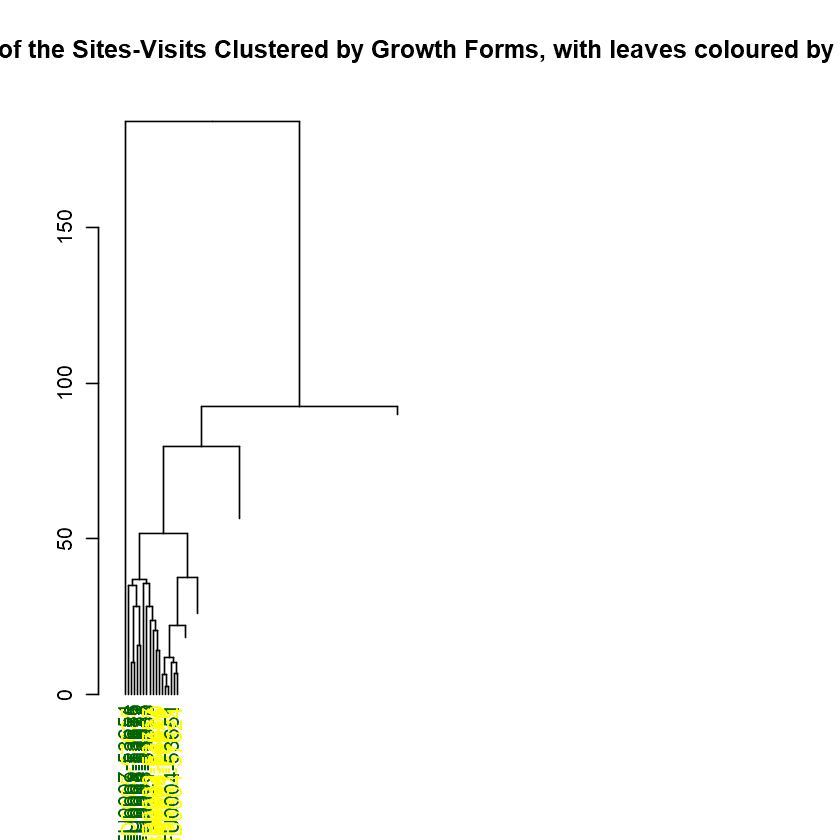

In [17]:

# Generate the Growth Form by Site-Visit Matrix
# =============================================
AP.BRTop5.GrowthFormBYSites = growth_form_table(AP.BioregTop5.l$veg.PI,                                                        m_kind="percent_cover", cover_type="PFC")  # % Cover
dim(AP.BRTop5.GrowthFormBYSites) # No of rows and cols in Matrix: 574 Sites x 19 Growth Forms
head(AP.BRTop5.GrowthFormBYSites)


# Enrich DF
# =========

# Create a 'site_unique' variable in Growth Form by Site-VisitTable to relate both datasets
# -----------------------------------------------------------------------------------------
AP.BRTop5.GrowthFormBYSites$site_unique = rownames(AP.BRTop5.GrowthFormBYSites)	

# Add: Bioregion, Longitude, Latitude
# -----------------------------------
# Both DF have different number of rows (again!)
dim(AP.BRTop5.GrowthFormBYSites)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BRTop5.GrowthFormBYSites  = merge(AP.BRTop5.GrowthFormBYSites, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BRTop5.GrowthFormBYSites), 
																							"bioregion.f", "longitude", "latitude")]
AP.BRTop5.GrowthFormBYSites = na.omit(AP.BRTop5.GrowthFormBYSites)
#head(AP.BRTop5.GrowthFormBYSites)
summary(AP.BRTop5.GrowthFormBYSites)
names(AP.BRTop5.GrowthFormBYSites)

# Summary Statistics for Each Growth Form
# =======================================
AP.BRTop5.GFBYSites.DescStats = data.frame(
  Min = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2,               min), # Minimum
  Med = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2,               median), # Median
  Max = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2,               max), # Maximum
  Mean = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2,                mean), # Mean
  SD = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2,               sd) # Standard Deviation
  )
AP.BRTop5.GFBYSites.DescStats = round(AP.BRTop5.GFBYSites.DescStats, 2)
AP.BRTop5.GFBYSites.DescStats


# Create and Plot a Dendogram of the Sites-Visits Clustered by Growth Forms
# =========================================================================

# Add rownames to be used as Leaves Names
rownames(AP.BRTop5.GrowthFormBYSites) = AP.BRTop5.GrowthFormBYSites$site_unique

# Create Dendogram
AP.BRTop5.GFBYSites.dend = as.dendrogram(hclust(dist(AP.BRTop5.GrowthFormBYSites[,1: (dim(AP.BRTop5.GrowthFormBYSites)[2]-4)]), "average"))

# Color the Leaves by Bioregion
# NOTE: The most sampled bioregions might change as new data is added. If so, bioregions codes bellow should be revised.
# Here the codes correspond to: MDD (Murry Darling Depression), SSD (Simpson 
# Strzelecki Dunefields), GFU (Gulf Fall and Uplands), STP (Stony Plains), 
# PIL (Pilbara)
AP.BRTop5.GrowthFormBYSites$bioregion.col.f = AP.BRTop5.GrowthFormBYSites$bioregion.f
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "GFU"] = "darkgreen"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "MDD"] = "magenta"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "PIL"] = "red"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "SSD"] = "yellow"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "STP"] = "cyan"
dend.colors = as.character(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)
#dend.colors
dend.colors = dend.colors[order.dendrogram(AP.BRTop5.GFBYSites.dend)]
#dend.colors
labels_colors(AP.BRTop5.GFBYSites.dend) = dend.colors
# Plot Dendrogram
par(mfrow=c(1,1))
plot(AP.BRTop5.GFBYSites.dend, 
     main="Dendogram of the Sites-Visits Clustered by Growth Forms, with leaves coloured by            Bioregion")



### TOTAL VEGETATION COVER BY GROWTH FORM AND/OR HEIGHT: `single_cover_value` function (for 5 most sampled bioregions).

Similar to the `growth_form_table` function, the `single_cover_value` function can calculate Vegetation Cover Values per Site from Raw Vegetation Point Intercept data from AusPlots. However, the `single_cover_value` can perform these computations for:

  (1) Vegetation of *particular growth form types* (i.e. for individual growth form types or any combination of growth form types). 
  (2) Vegetation *higher that a specified height threshold*
  (3) Vegetation with any combination of *growth form types* and *minimum height*

Specifically `single_cover_value` takes the following inputs via its arguments:

* *Raw Vegetation Point Intercept data from AusPlots* (argument `veg.PI`):  A `veg.PI` data frame generated by the `get_ausplots` function (see above). 
* *Method used to Calculate Cover*  (argument `in_canopy_sky`): A logical value that indicates whether to use in canopy sky hits (i.e. calculate opaque canopy cover) or projected foliage cover . The default value, `FALSE`, calculates projected foliage cover. To calculate opaque canopy cover the argument must be set to `TRUE. 
* *Whether to Calculate Cover for a Subset by Growth Form Type* (argument `by.growth_form`): A logical value that indicates whether to subset by growth form type. The default, `TRUE`, calculates cover for the growth form types specified in the argument `my.growth_forms`. If set to `FALSE` cover calculations are conducted only for the vegetation subsetted by a Minimum Height.
* *Growth Form Types used to Subset Data used for the Cover Calculations*  (argument `my.growth_forms`):  A character vector specifying the growth form types to subset the data used for the cover calculations. Any combination of growth form types can be used. The default, `c("Tree/Palm", "Tree Mallee")`, is set to represent trees. It applies only when `by.growth_form=TRUE`; otherwise, this argument is ignored and only height subsetting is applied. 
* *Minimum Height Threshold used to Subset Data used for the Cover Calculations*  (argument `min.height`): A numeric value indicating the minimum height (in metres) of the vegetation to included in the subset of the data used for the cover calculations. 
A height must be always provided. The default, `5`, is set up for a cover of trees. It can be set to zero to ignore height and include any plant hit. If set to a negative number, it will return nonsensical output. 

When `by.growth_form = FALSE` and `min.height = 0`, the output is nearly the same as the green cover fraction returned from `fractional_cover`. The values can differ because `fractional_cover` applies a height rule in which the highest intercept at a given point is taken, whereas `single_cover_value` finds any green cover (e.g. when dead trees overhang green understorey). For such general cover purposes, using `fractional_cover` is recommended. `single_cover_value` is best suited to cover subset by height and growth form.

Next, several examples of how to compute, manipulate, and visualise 'Single' Vegetation Cover Fraction (VCF) data are presented. The examples cover different scenarios for subsetting the input vegetation point intercept data frame prior to the calculation of the corresponding VCF. These include:

* Subsetting only by Height
* Subsetting only by Taxonomoy
* Subsetting by Height and Taxonomy


#### Subsetting by Height only


site_unique,VCF.gt0,VCF.gt2
NSAMDD0001-56965,45.74,0.00
NSAMDD0002-56952,55.45,39.21
NSAMDD0003-56968,47.52,4.65
NSAMDD0004-56953,35.05,10.99
NSAMDD0005-56969,31.29,23.76
NSAMDD0006-56954,34.95,11.29


           site_unique     VCF.gt0         VCF.gt2     
 NSAMDD0001-56965:  1   Min.   : 0.20   Min.   : 0.00  
 NSAMDD0002-56952:  1   1st Qu.:20.00   1st Qu.: 0.20  
 NSAMDD0003-56968:  1   Median :32.57   Median : 7.13  
 NSAMDD0004-56953:  1   Mean   :35.45   Mean   :12.66  
 NSAMDD0005-56969:  1   3rd Qu.:48.51   3rd Qu.:20.79  
 NSAMDD0006-56954:  1   Max.   :84.06   Max.   :70.89  
 (Other)         :203                                  

site_unique,VCF.gt0,VCF.gt2,VCF.0to2
NSAMDD0001-56965,45.74,0.00,45.74
NSAMDD0002-56952,55.45,39.21,16.24
NSAMDD0003-56968,47.52,4.65,42.87
NSAMDD0004-56953,35.05,10.99,24.06
NSAMDD0005-56969,31.29,23.76,7.53
NSAMDD0006-56954,34.95,11.29,23.66


           site_unique     VCF.gt0         VCF.gt2         VCF.0to2    
 NSAMDD0001-56965:  1   Min.   : 0.20   Min.   : 0.00   Min.   : 0.20  
 NSAMDD0002-56952:  1   1st Qu.:20.00   1st Qu.: 0.20   1st Qu.:11.78  
 NSAMDD0003-56968:  1   Median :32.57   Median : 7.13   Median :20.39  
 NSAMDD0004-56953:  1   Mean   :35.45   Mean   :12.66   Mean   :22.79  
 NSAMDD0005-56969:  1   3rd Qu.:48.51   3rd Qu.:20.79   3rd Qu.:32.27  
 NSAMDD0006-56954:  1   Max.   :84.06   Max.   :70.89   Max.   :68.02  
 (Other)         :203                                                  

[1] 209   4

[1] 215  44

site_unique,VCF.gt0,VCF.gt2,VCF.0to2,bioregion.f,longitude,latitude
NSAMDD0001-56965,45.74,0.00,45.74,MDD,142.5602,-34.18392
NSAMDD0002-56952,55.45,39.21,16.24,MDD,142.6026,-34.20482
NSAMDD0003-56968,47.52,4.65,42.87,MDD,142.6041,-34.20754
NSAMDD0004-56953,35.05,10.99,24.06,MDD,142.5594,-34.16537
NSAMDD0005-56969,31.29,23.76,7.53,MDD,143.2039,-33.65619
NSAMDD0006-56954,34.95,11.29,23.66,MDD,143.1665,-33.66432


           site_unique     VCF.gt0         VCF.gt2         VCF.0to2    
 NSAMDD0001-56965:  1   Min.   : 0.20   Min.   : 0.00   Min.   : 0.20  
 NSAMDD0002-56952:  1   1st Qu.:20.00   1st Qu.: 0.20   1st Qu.:11.78  
 NSAMDD0003-56968:  1   Median :32.57   Median : 7.13   Median :20.39  
 NSAMDD0004-56953:  1   Mean   :35.45   Mean   :12.66   Mean   :22.79  
 NSAMDD0005-56969:  1   3rd Qu.:48.51   3rd Qu.:20.79   3rd Qu.:32.27  
 NSAMDD0006-56954:  1   Max.   :84.06   Max.   :70.89   Max.   :68.02  
 (Other)         :203                                                  
 bioregion.f   longitude        latitude     
 FLB:33      Min.   :132.9   Min.   :-35.08  
 GFU:41      1st Qu.:136.0   1st Qu.:-33.17  
 MDD:50      Median :138.2   Median :-27.87  
 SSD:46      Mean   :138.3   Mean   :-27.01  
 STP:39      3rd Qu.:139.4   3rd Qu.:-23.76  
             Max.   :145.8   Max.   :-14.05  
                                             

[1] "site_unique" "VCF.gt0"     "VCF.gt2"     "VCF.0to2"    "bioregion.f"
[6] "longitude"   "latitude"

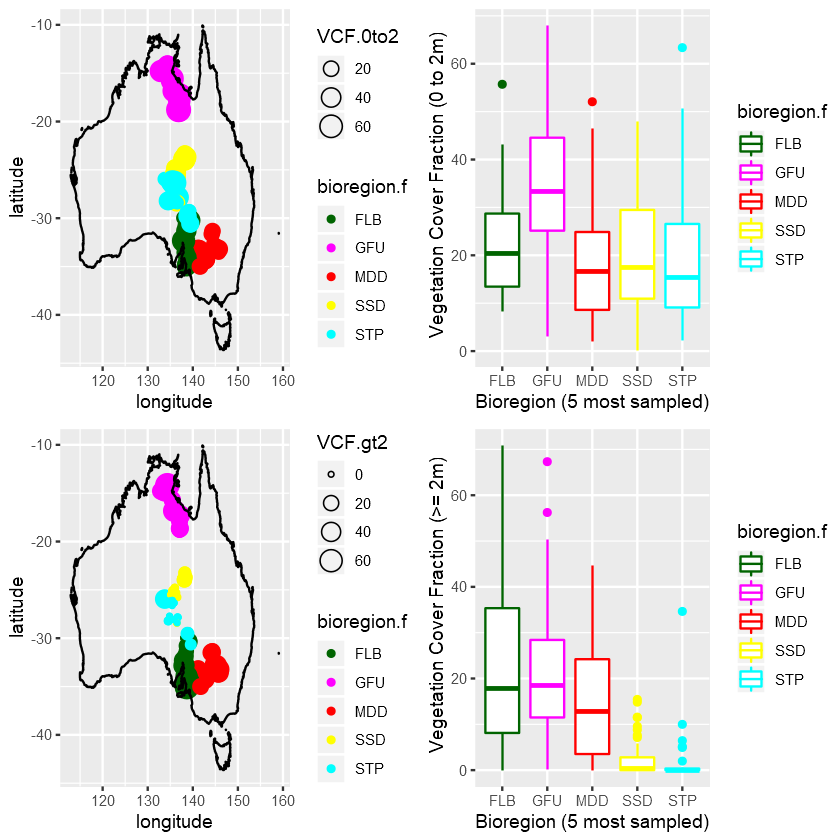

In [18]:

# Subsetting by Height only
# *************************

# Compute Single Cover Values Tables
# ==================================
# Any green vegeation (i.e. >= 0m in height)
veg.cover.gt0 = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=FALSE, min.height=0)
# Any green vegeation >= 2m in height
veg.cover.gt2 = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=FALSE, min.height=2)


# Combine all Tables into a Sigle Data Frame
# ==========================================
# Create a data frame containing all the Vegetation Cover Fractions
AP.BioregTop5.VCF.df = data.frame(site_unique=veg.cover.gt0$site_unique, VCF.gt0=veg.cover.gt0$percentCover, VCF.gt2=veg.cover.gt2$percentCover)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)


# Enrich DF
# =========

# Compute Vegetation Cover Fractions for Height Ranges
# ----------------------------------------------------
AP.BioregTop5.VCF.df$VCF.0to2 = AP.BioregTop5.VCF.df$VCF.gt0 - AP.BioregTop5.VCF.df$VCF.gt2
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)

# Add: Bioregion, Longitude, Latitude
# -----------------------------------

# Both DF have different number of rows
dim(AP.BioregTop5.VCF.df)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.VCF.df  = merge(AP.BioregTop5.VCF.df, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BioregTop5.VCF.df), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.VCF.df = na.omit(AP.BioregTop5.VCF.df)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)
names(AP.BioregTop5.VCF.df)


# Graphical Visualisation
# =======================

# VCF 0 to 2m: Map with circle size = the Vegetation Cover Fraction for any green veg. 
# ------------------------------------------------------------------------------------
# (i.e. >= 0m in height)
AP.BioregTop5.VCF.df.p1 = 
ggplot(data=AP.BioregTop5.VCF.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=VCF.0to2), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# VCF 0 to 2m: Boxplot
# --------------------
AP.BioregTop5.VCF.df.p2 = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.0to2, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Vegetation Cover Fraction (0 to 2m)") + 
theme(plot.title = element_text(hjust = 0.5))

# VCF >= 2m: Map with circle size = the Vegetation Cover Fraction for any green veg. 
# ----------------------------------------------------------------------------------
# (i.e. >= 0m in height)
AP.BioregTop5.VCF.df.p3 = 
ggplot(data=AP.BioregTop5.VCF.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=VCF.gt2), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# VCF  >= 2m: Boxplot
# -------------------
AP.BioregTop5.VCF.df.p4 = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.gt2, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Vegetation Cover Fraction (>= 2m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.VCF.df.p1, AP.BioregTop5.VCF.df.p2, 
             AP.BioregTop5.VCF.df.p3, AP.BioregTop5.VCF.df.p4, nrow=2)
#grid.arrange(AP.BioregTop5.VCF.df.p1, AP.BioregTop5.VCF.df.p2,
#             AP.BioregTop5.VCF.df.p3, AP.BioregTop5.VCF.df.p4, ncol=2)



#### Subsetting by Taxonomy only 


site_unique,VCF.trees,VCF.grass
NSAMDD0001-56965,0.00,0.89
NSAMDD0002-56952,42.57,17.33
NSAMDD0003-56968,0.20,0.00
NSAMDD0004-56953,10.40,0.00
NSAMDD0005-56969,24.65,0.10
NSAMDD0006-56954,11.68,0.00


           site_unique    VCF.trees       VCF.grass    
 NSAMDD0001-56965:  1   Min.   : 0.00   Min.   : 0.00  
 NSAMDD0002-56952:  1   1st Qu.: 0.00   1st Qu.: 0.79  
 NSAMDD0003-56968:  1   Median : 2.28   Median : 6.63  
 NSAMDD0004-56953:  1   Mean   :10.08   Mean   :13.53  
 NSAMDD0005-56969:  1   3rd Qu.:14.95   3rd Qu.:21.49  
 NSAMDD0006-56954:  1   Max.   :70.89   Max.   :67.43  
 (Other)         :203                                  

[1] 209   3

[1] 215  44

site_unique,VCF.trees,VCF.grass,bioregion.f,longitude,latitude
NSAMDD0001-56965,0.00,0.89,MDD,142.5602,-34.18392
NSAMDD0002-56952,42.57,17.33,MDD,142.6026,-34.20482
NSAMDD0003-56968,0.20,0.00,MDD,142.6041,-34.20754
NSAMDD0004-56953,10.40,0.00,MDD,142.5594,-34.16537
NSAMDD0005-56969,24.65,0.10,MDD,143.2039,-33.65619
NSAMDD0006-56954,11.68,0.00,MDD,143.1665,-33.66432


           site_unique    VCF.trees       VCF.grass     bioregion.f
 NSAMDD0001-56965:  1   Min.   : 0.00   Min.   : 0.00   FLB:33     
 NSAMDD0002-56952:  1   1st Qu.: 0.00   1st Qu.: 0.79   GFU:41     
 NSAMDD0003-56968:  1   Median : 2.28   Median : 6.63   MDD:50     
 NSAMDD0004-56953:  1   Mean   :10.08   Mean   :13.53   SSD:46     
 NSAMDD0005-56969:  1   3rd Qu.:14.95   3rd Qu.:21.49   STP:39     
 NSAMDD0006-56954:  1   Max.   :70.89   Max.   :67.43              
 (Other)         :203                                              
   longitude        latitude     
 Min.   :132.9   Min.   :-35.08  
 1st Qu.:136.0   1st Qu.:-33.17  
 Median :138.2   Median :-27.87  
 Mean   :138.3   Mean   :-27.01  
 3rd Qu.:139.4   3rd Qu.:-23.76  
 Max.   :145.8   Max.   :-14.05  
                                 

[1] "site_unique" "VCF.trees"   "VCF.grass"   "bioregion.f" "longitude"  
[6] "latitude"

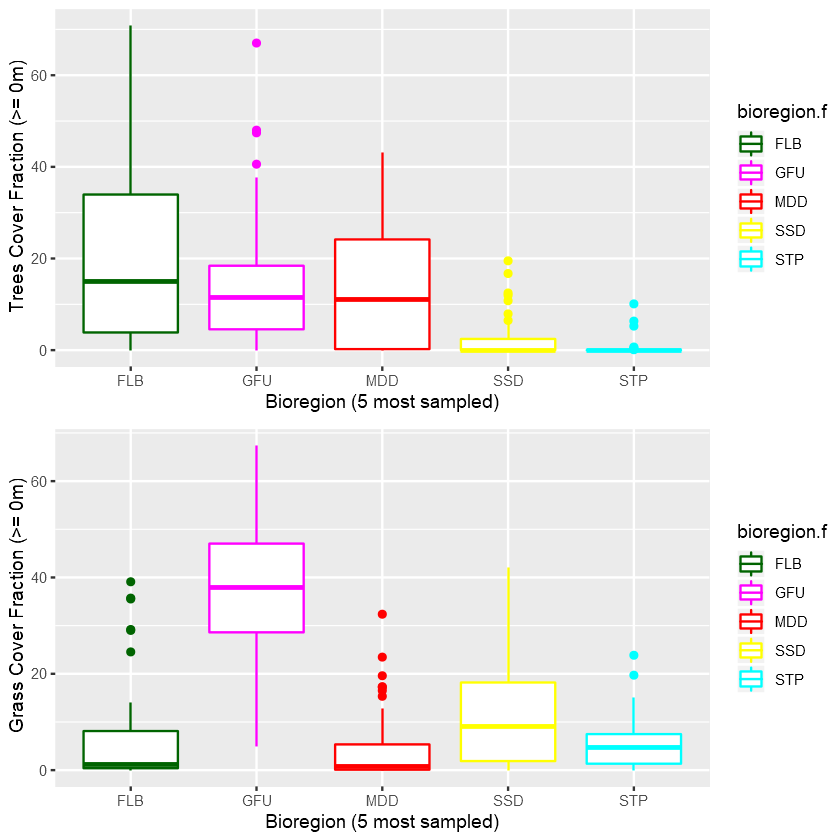

In [19]:

# Subsetting y Taxonomy only
# ***************************

# Compute Single Cover Values Tables
# ==================================
# Trees (by default my.growth_forms=c("Tree/Palm", "Tree Mallee"))
veg.cover.trees = single_cover_value(AP.BioregTop5.l$veg.PI, min.height=0)
# Grasses (my.growth_forms=c("Hummock.grass", "Tussock.grass"))
veg.cover.grass = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=TRUE, my.growth_forms=c("Hummock grass", "Tussock grass"), min.height=0)


# Combine all Tables into a Sigle Data Frame
# ==========================================
# Create a data frame containing all the Vegetation Cover Fractions
AP.BioregTop5.VCF.df = data.frame(site_unique=veg.cover.trees$site_unique, VCF.trees=veg.cover.trees$percentCover, VCF.grass=veg.cover.grass$percentCover)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)


# Enrich DF
# =========

# Add: Bioregion, Longitude, Latitude
# -----------------------------------

# Both DF have different number of rows
dim(AP.BioregTop5.VCF.df)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.VCF.df  = merge(AP.BioregTop5.VCF.df, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BioregTop5.VCF.df), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.VCF.df = na.omit(AP.BioregTop5.VCF.df)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)
names(AP.BioregTop5.VCF.df)


# Graphical Visualisation
# =======================

# Trees: Boxplot
# --------------
AP.BioregTop5.VCF.trees = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.trees, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Trees Cover Fraction (>= 0m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Grass: Boxplot
# --------------
AP.BioregTop5.VCF.grass = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.grass, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Grass Cover Fraction (>= 0m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.VCF.trees, AP.BioregTop5.VCF.grass, nrow=2)
#grid.arrange(AP.BioregTop5.BA.trees, AP.BioregTop5.VCF.grass, ncol=2)



#### Subsetting by Taxonomy and Height


[1] TRUE

[1] 209   2

[1] 215  44

site_unique,percentCover,bioregion.f,longitude,latitude
NSAMDD0001-56965,0.00,MDD,142.5602,-34.18392
NSAMDD0002-56952,3.56,MDD,142.6026,-34.20482
NSAMDD0003-56968,0.00,MDD,142.6041,-34.20754
NSAMDD0004-56953,8.51,MDD,142.5594,-34.16537
NSAMDD0005-56969,6.93,MDD,143.2039,-33.65619
NSAMDD0006-56954,8.22,MDD,143.1665,-33.66432


           site_unique   percentCover    bioregion.f   longitude    
 NSAMDD0001-56965:  1   Min.   : 0.000   FLB:33      Min.   :132.9  
 NSAMDD0002-56952:  1   1st Qu.: 0.000   GFU:41      1st Qu.:136.0  
 NSAMDD0003-56968:  1   Median : 0.200   MDD:50      Median :138.2  
 NSAMDD0004-56953:  1   Mean   : 6.192   SSD:46      Mean   :138.3  
 NSAMDD0005-56969:  1   3rd Qu.: 6.930   STP:39      3rd Qu.:139.4  
 NSAMDD0006-56954:  1   Max.   :70.000               Max.   :145.8  
 (Other)         :203                                               
    latitude     
 Min.   :-35.08  
 1st Qu.:-33.17  
 Median :-27.87  
 Mean   :-27.01  
 3rd Qu.:-23.76  
 Max.   :-14.05  
                 

[1] "site_unique"  "percentCover" "bioregion.f"  "longitude"    "latitude"

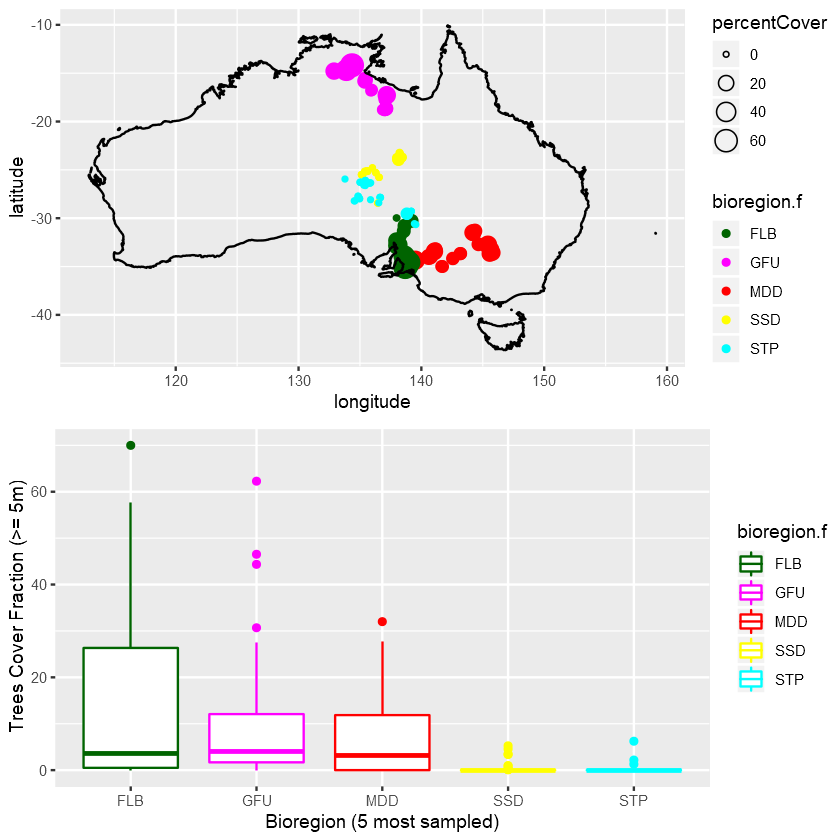

In [21]:

# Subsetting by Taxonomy and Height
# *********************************

# Compute Single Cover Values Tables
# ==================================
# Trees (by default my.growth_forms=c("Tree/Palm", "Tree Mallee"))
veg.cover.trees.gt5 = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=TRUE, my.growth_forms=c("Tree/Palm", "Tree Mallee"), min.height=5)

# These are the default values for the arguments of the function 'single_cover_value'
# So the following function call would produce exactly the same results
veg.cover.trees.gt5.2 = single_cover_value(AP.BioregTop5.l$veg.PI)
all.equal(veg.cover.trees.gt5, veg.cover.trees.gt5.2)
rm(veg.cover.trees.gt5.2)


# Enrich DF
# =========

# Add: Bioregion, Longitude, Latitude
# -----------------------------------

# Both DF have different number of rows
dim(veg.cover.trees.gt5)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.VCF.trees.gt5.df  = merge(veg.cover.trees.gt5, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(veg.cover.trees.gt5), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.VCF.trees.gt5.df = na.omit(AP.BioregTop5.VCF.trees.gt5.df)
head(AP.BioregTop5.VCF.trees.gt5.df)
summary(AP.BioregTop5.VCF.trees.gt5.df)
names(AP.BioregTop5.VCF.trees.gt5.df)


# Graphical Visualisation
# =======================

# Map with circle size = Percent Cover
# ------------------------------------
AP.BioregTop5.VCF.trees.gt5.p1 = 
ggplot(data=AP.BioregTop5.VCF.trees.gt5.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=percentCover), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Boxplot
# -------
AP.BioregTop5.VCF.trees.gt5.p2 = 
ggplot(AP.BioregTop5.VCF.trees.gt5.df, aes(x=bioregion.f, y=percentCover, color=bioregion.f)) + geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Trees Cover Fraction (>= 5m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.VCF.trees.gt5.p1, AP.BioregTop5.VCF.trees.gt5.p2, nrow=2)
#grid.arrange(AP.BioregTop5.VCF.trees.gt5.p1, AP.BioregTop5.VCF.trees.gt5.p2, ncol=2)



### BASAL AREA (OR NUMBER OF BASAL WEDGE HITS): `basal_area` function (for 5 most sampled bioregions).

 The `basal_area` function calculates the Basal Area (or Number of Basal Wedge Hits) for each plot, using the raw basal wedge data returned by the `get_ausplots` funcion also in the `ausplotsR` package. This function returns a data frame with rows representing Plots (or species by plots) and a single column containning the Basal Area (m2/ha) or Hit Scores. 

  In this section we will: 

  * Compute the Basal Area for each plot (m2/ha) using the `basal_area` function.
  * Enrich the data frame containing the Basal Area data with additional information (i.e. plot -Site-Visit-, bioregion, longitude, and latitude). 
  * Display Basal Areas on map of Australia (with Dots size proportional to Basal Area).
  * Boxplot of Basal Areas by Bioregion. 


 site_unique        basal_area_m2_ha 
 Length:103         Min.   : 0.2857  
 Class :character   1st Qu.: 1.4937  
 Mode  :character   Median : 3.9444  
                    Mean   : 5.6575  
                    3rd Qu.: 6.6597  
                    Max.   :40.2500  

site_unique,basal_area_m2_ha
NSAMDD0002-56952,4.583333
NSAMDD0004-56953,4.805556
NSAMDD0005-56969,5.538889
NSAMDD0006-56954,4.077778
NSAMDD0007-56970,4.205556
NSAMDD0009-56971,14.694444


[1] "site_unique"      "basal_area_m2_ha"

 site_unique        basal_area_m2_ha 
 Length:103         Min.   : 0.2857  
 Class :character   1st Qu.: 1.4937  
 Mode  :character   Median : 3.9444  
                    Mean   : 5.6575  
                    3rd Qu.: 6.6597  
                    Max.   :40.2500  

site_unique,basal_area_m2_ha
NSAMDD0002-56952,4.583333
NSAMDD0004-56953,4.805556
NSAMDD0005-56969,5.538889
NSAMDD0006-56954,4.077778
NSAMDD0007-56970,4.205556
NSAMDD0009-56971,14.694444


[1] 103   2

[1] 215  44

site_unique,basal_area_m2_ha,bioregion.f,longitude,latitude
NSAMDD0002-56952,4.583333,MDD,142.6026,-34.20482
NSAMDD0004-56953,4.805556,MDD,142.5594,-34.16537
NSAMDD0005-56969,5.538889,MDD,143.2039,-33.65619
NSAMDD0006-56954,4.077778,MDD,143.1665,-33.66432
NSAMDD0007-56970,4.205556,MDD,141.1608,-33.37998
NSAMDD0009-56971,14.694444,MDD,141.0655,-33.44049


 site_unique        basal_area_m2_ha  bioregion.f   longitude    
 Length:103         Min.   : 0.2857   FLB:27      Min.   :132.9  
 Class :character   1st Qu.: 1.4937   GFU:34      1st Qu.:136.9  
 Mode  :character   Median : 3.9444   MDD:28      Median :138.6  
                    Mean   : 5.6575   SSD: 9      Mean   :138.6  
                    3rd Qu.: 6.6597   STP: 5      3rd Qu.:140.6  
                    Max.   :40.2500               Max.   :145.8  
    latitude     
 Min.   :-35.08  
 1st Qu.:-33.35  
 Median :-30.34  
 Mean   :-26.46  
 3rd Qu.:-17.90  
 Max.   :-14.05  

[1] "site_unique"      "basal_area_m2_ha" "bioregion.f"      "longitude"       
[5] "latitude"

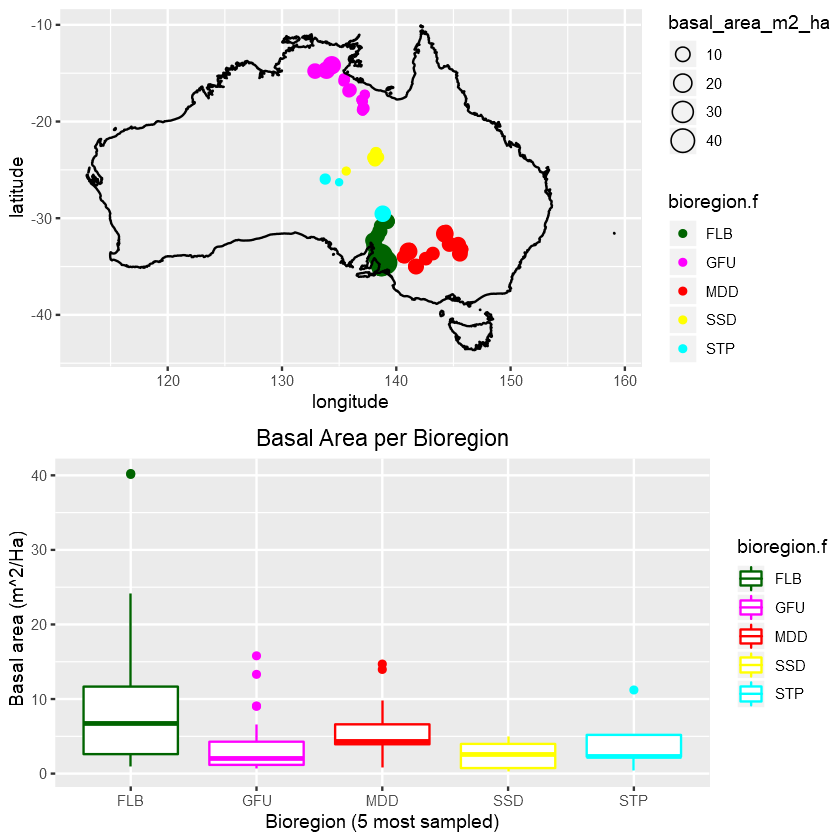

In [22]:

# Calculate Basal Area
# ====================
AP.BioregTop5.BA = basal_area(AP.BioregTop5.l$veg.basal)
summary(AP.BioregTop5.BA)
head(AP.BioregTop5.BA)


# Enrich DF
# =========
# Preparation
colnames(AP.BioregTop5.BA) 
summary(AP.BioregTop5.BA)
head(AP.BioregTop5.BA)

# Add: Bioregion, Longitude, Latitude
# -----------------------------------
# Both DF have different number of rows
dim(AP.BioregTop5.BA)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.BA  = merge(AP.BioregTop5.BA, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BioregTop5.BA), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.BA = na.omit(AP.BioregTop5.BA)
head(AP.BioregTop5.BA)
summary(AP.BioregTop5.BA)
names(AP.BioregTop5.BA)


# Graphical Visualisation
# =======================

# Map with circle size = Basal Area (m2/ha)
# -----------------------------------------
AP.BioregTop5.BA.p1 = 
ggplot(data=AP.BioregTop5.BA, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=basal_area_m2_ha), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Boxplot
# -------
AP.BioregTop5.BA.p2 = 
ggplot(AP.BioregTop5.BA, aes(x=bioregion.f, y=basal_area_m2_ha, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(title="Basal Area per Bioregion",x="Bioregion (5 most sampled)", y = "Basal area (m^2/Ha)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.BA.p1, AP.BioregTop5.BA.p2, nrow=2)
#grid.arrange(AP.BioregTop5.BA.p1, AP.BioregTop5.BA.p2, ncol=2)
